## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# installing and importing tabulate
# !pip install tabulate # if appicable
import tabulate

import math
import numpy as np

# Import libraries for running ANOVA and post-hoc test
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import levene, shapiro

In [2]:
#from an excel file --- need to install openpyxl dependency

#from github
username = "datagus"
repository = "ASDA2025"
directory = "datasets/homework_week5/world_bank_development_indicators.csv"
github_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"
indicators_df = pd.read_csv(github_url)

In [3]:
#from github
username = "datagus"
repository = "ASDA2025"
directory = "datasets/homework_week5/income.xlsx"
github_url = f"https://raw.githubusercontent.com/{username}/{repository}/main/{directory}"
income_xls = pd.ExcelFile(github_url)

In [4]:
# Check column names of the indicators dataframe
indicators_df.columns

Index(['country', 'date', 'agricultural_land%', 'forest_land%', 'land_area',
       'avg_precipitation', 'trade_in_services%',
       'control_of_corruption_estimate', 'control_of_corruption_std',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'electric_power_consumption', 'CO2_emisions',
       'other_greenhouse_emisions', 'population_density', 'inflation_annual%',
       'real_interest_rate', 'risk_premium_on_lending',
       'research_and_development_expenditure%', 'central_goverment_debt%',
       'tax_revenue%', 'expense%', 'goverment_effectiveness_estimate',
       'goverment_effectiveness_std', 'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'individuals_using_internet%', 'logistic_performance_index',
       'military_expenditure%', 'GDP_current_US',
       'political_stability_estimate', 'political_stability_std',
       'rule_of_law_estimate', 'rule_of_law_std',
       'reg

In [5]:
# Preview the indicators dataframe
indicators_df.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [6]:
# Get a concise summary of the dataframe
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

## Data Cleansing and Merging

In [7]:
# Drop redundant columns, columns showing statistical output (not indicator itself), columns with high sparsity and technically complex or irrelevant indicators
columns_to_drop = [
# 1.Redundant and statistical columns (8 Columns)    
    'control_of_corruption_std',
    'goverment_effectiveness_std',
    'political_stability_std',
    'rule_of_law_std',
    'regulatory_quality_std',
    'voice_and_accountability_std',
    'other_greenhouse_emisions',  
    'land_area',                 

# 2. Columns with high missing values (10 Columns)
    'human_capital_index',
    'doing_business',
    'time_to_get_operation_license',
    'multidimensional_poverty_headcount_ratio%',
    'statistical_performance_indicators',
    'logistic_performance_index',
    'central_goverment_debt%',
    'gini_index',
    'risk_premium_on_lending',
    'research_and_development_expenditure%',

# 3. Irrelevent Indicators (12 Columns)
    'avg_precipitation',          
    'trade_in_services%',         
    'real_interest_rate',         
    'expense%',                   
    'electric_power_consumption', 
    'individuals_using_internet%',
    'military_expenditure%', 
    'regulatory_quality_estimate', 
    'birth_rate',                 
    'death_rate',                 
    'rural_population',         
    'intentional_homicides'       
]

# Create the clean DataFrame by dropping the columns
cleanindicators_df = indicators_df.drop(columns=columns_to_drop)

# Get a concise summary of the cleaned dataframe
cleanindicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               17272 non-null  object 
 1   date                                  17272 non-null  object 
 2   agricultural_land%                    14714 non-null  float64
 3   forest_land%                          8176 non-null   float64
 4   control_of_corruption_estimate        4783 non-null   float64
 5   access_to_electricity%                7348 non-null   float64
 6   renewvable_energy_consumption%        8076 non-null   float64
 7   CO2_emisions                          7408 non-null   float64
 8   population_density                    14901 non-null  float64
 9   inflation_annual%                     10788 non-null  float64
 10  tax_revenue%                          5125 non-null   float64
 11  goverment_effec

In [8]:
# Preview the cleaned indicators dataframe
cleanindicators_df.head()

,country,date,agricultural_land%,forest_land%,control_of_corruption_estimate,access_to_electricity%,renewvable_energy_consumption%,CO2_emisions,population_density,inflation_annual%,tax_revenue%,goverment_effectiveness_estimate,GDP_current_US,political_stability_estimate,rule_of_law_estimate,government_expenditure_on_education%,government_health_expenditure%,life_expectancy_at_birth,population,voice_and_accountability_estimate
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,32.535,8622466.0,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,NaN,NaN,NaN,NaN,13.477056,NaN,NaN,NaN,5.488889e+08,NaN,NaN,NaN,NaN,33.068,8790140.0,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,NaN,NaN,NaN,NaN,13.751356,NaN,NaN,NaN,5.466667e+08,NaN,NaN,NaN,NaN,33.547,8969047.0,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,NaN,NaN,NaN,NaN,14.040239,NaN,NaN,NaN,7.511112e+08,NaN,NaN,NaN,NaN,34.016,9157465.0,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,NaN,NaN,NaN,NaN,14.343888,NaN,NaN,NaN,8.000000e+08,NaN,NaN,NaN,NaN,34.494,9355514.0,NaN


In [9]:
# List all sheets of income excel file
print(income_xls.sheet_names)

['List of economies', 'composition', 'notes']


In [10]:
# Parse and create the different dataframes:
economies_df = income_xls.parse('List of economies')
#composition_df = income_xls.parse('composition')

In [11]:
# Preview the economies dataframe
economies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Economy           266 non-null    object
 1   Code              266 non-null    object
 2   Region            218 non-null    object
 3   Income group      216 non-null    object
 4   Lending category  145 non-null    object
dtypes: object(5)
memory usage: 10.6+ KB


In [12]:
# Drop rows with missing 'Region' values
economies_df.dropna(subset=['Region'], inplace=True)
economies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Economy           218 non-null    object
 1   Code              218 non-null    object
 2   Region            218 non-null    object
 3   Income group      216 non-null    object
 4   Lending category  145 non-null    object
dtypes: object(5)
memory usage: 10.2+ KB


In [13]:
# Preview the economies dataframe
economies_df.head()

,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,"Middle East, North Africa, Afghanistan & Pakistan",Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [14]:
# Unique country names from economies_df
unique_economies = economies_df['Economy'].unique()

# Unique country names from cleanindicators_df
unique_indicators = cleanindicators_df['country'].unique()

print("Unique countries in economies_df:", len(unique_economies))
print(unique_economies[:20])  # show first 20 for preview

print("\nUnique countries in cleanindicators_df:", len(unique_indicators))
print(unique_indicators[:20])

Unique countries in economies_df: 218
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize']

Unique countries in cleanindicators_df: 274
['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados']


In [15]:
# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("Countries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))


Countries only in economies_df (not in cleanindicators_df): 7
['Curaçao', 'Côte d’Ivoire', 'Puerto Rico (U.S.)', 'Somalia, Fed. Rep.', 'São Tomé and Príncipe', 'Taiwan, China', 'Türkiye']

Countries only in cleanindicators_df (not in economies_df): 63
['Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Caribbean small states', 'Central Europe and the Baltics', "Cote d'Ivoire", 'Curacao', 'Czech Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Late-demographic div

In [16]:
# Remove aggregate groups from cleanindicators_df
groups_to_remove = [
    'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World',
    'Caribbean small states', 'Central Europe and the Baltics', 'Early-demographic dividend',
    'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)',
    'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)',
    'European Union', 'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only',
    'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total',
    'Late-demographic dividend', 'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Latin America & Caribbean (IDA & IBRD)', 'Least developed countries: UN classification',
    'Low & middle income', 'Low income', 'Lower middle income',
    'Middle East, North Africa, Afghanistan and Pakistan',
    'Middle East, North Africa, Afghanistan and Pakistan (excluding high income)',
    'Middle East, North Africa, Afghanistan and Pakistan (IDA & IBRD)',
    'Middle income', 'North America', 'OECD members', 'Other small states',
    'Pacific island small states', 'Post-demographic dividend', 'Pre-demographic dividend',
    'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
    'Sub-Saharan Africa (IDA & IBRD)', 'Upper middle income', 'World', 'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD countries)',
    'Middle East & North Africa (IDA & IBRD)',
    'Middle East & North Africa (excluding high income)',
    'Not classified','Sub-Saharan Africa (IDA & IBRD countries)','Latin America & the Caribbean (IDA & IBRD countries)'
]

# Filter out the groups from cleanindicators_df
cleanindicators_df = cleanindicators_df[~cleanindicators_df['country'].isin(groups_to_remove)]

# Print remaining unique countries
print("Remaining unique countries:", cleanindicators_df['country'].nunique())

# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("\nCountries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))


Remaining unique countries: 220

Countries only in economies_df (not in cleanindicators_df): 7
['Curaçao', 'Côte d’Ivoire', 'Puerto Rico (U.S.)', 'Somalia, Fed. Rep.', 'São Tomé and Príncipe', 'Taiwan, China', 'Türkiye']

Countries only in cleanindicators_df (not in economies_df): 9
["Cote d'Ivoire", 'Curacao', 'Czech Republic', 'Puerto Rico', 'Sao Tome and Principe', 'Somalia', 'Turkey', 'Turkiye', 'Viet Nam']


In [17]:
# Mapping accented names to simpler names
economies_name_mapping = {
    "Curaçao": "Curacao",
    "Côte d’Ivoire": "Cote d'Ivoire",
    "Puerto Rico (U.S.)": "Puerto Rico",
    "Somalia, Fed. Rep.": "Somalia",
    "São Tomé and Príncipe": "Sao Tome and Principe",
    "Türkiye": "Turkey",
    "Czechia": "Czech Republic"  # optional depending on your cleanindicators_df
}

economies_df['Economy'] = economies_df['Economy'].replace(economies_name_mapping)

# Drop the entry
economies_df = economies_df[economies_df['Economy'] != "Taiwan, China"]

# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("Countries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))



Countries only in economies_df (not in cleanindicators_df): 0
[]

Countries only in cleanindicators_df (not in economies_df): 3
['Czechia', 'Turkiye', 'Viet Nam']


In [18]:
# Check data in specific country names
variant_names = ['Czechia', 'Turkiye', 'Viet Nam']

# Show non-NA counts per column for these rows
print(cleanindicators_df[cleanindicators_df['country'].isin(variant_names)].info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 3679 to 16856
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               192 non-null    object 
 1   date                                  192 non-null    object 
 2   agricultural_land%                    151 non-null    float64
 3   forest_land%                          93 non-null     float64
 4   control_of_corruption_estimate        72 non-null     float64
 5   access_to_electricity%                79 non-null     float64
 6   renewvable_energy_consumption%        93 non-null     float64
 7   CO2_emisions                          93 non-null     float64
 8   population_density                    151 non-null    float64
 9   inflation_annual%                     121 non-null    float64
 10  tax_revenue%                          70 non-null     float64
 11  goverment_effe

In [19]:
# Check data in specific country names 
variant_names = ['Czech Republic', 'Turkey', 'Vietnam']

# Show non-NA counts per column for these rows
print(cleanindicators_df[cleanindicators_df['country'].isin(variant_names)].info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 3648 to 16887
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               93 non-null     object 
 1   date                                  93 non-null     object 
 2   agricultural_land%                    0 non-null      float64
 3   forest_land%                          0 non-null      float64
 4   control_of_corruption_estimate        0 non-null      float64
 5   access_to_electricity%                0 non-null      float64
 6   renewvable_energy_consumption%        0 non-null      float64
 7   CO2_emisions                          0 non-null      float64
 8   population_density                    0 non-null      float64
 9   inflation_annual%                     0 non-null      float64
 10  tax_revenue%                          0 non-null      float64
 11  goverment_effec

In [20]:
# List of countries to remove
countries_to_remove = ['Czech Republic', 'Turkey', 'Vietnam']

# Keep only rows where country is NOT in the list
cleanindicators_df = cleanindicators_df[~cleanindicators_df['country'].isin(countries_to_remove)]

# Define the mapping
name_mapping = {
    'Czechia': 'Czech Republic',
    'Turkiye': 'Turkey',
    'Viet Nam': 'Vietnam'
}

# Apply the mapping
cleanindicators_df['country'] = cleanindicators_df['country'].replace(name_mapping)

# Convert to sets
set_econ = set(economies_df['Economy'])
set_ind = set(cleanindicators_df['country'])

# Find differences
only_in_economies = set_econ - set_ind
only_in_indicators = set_ind - set_econ

print("Countries only in economies_df (not in cleanindicators_df):", len(only_in_economies))
print(sorted(list(only_in_economies))[:20])  # show first 20

print("\nCountries only in cleanindicators_df (not in economies_df):", len(only_in_indicators))
print(sorted(list(only_in_indicators)))


Countries only in economies_df (not in cleanindicators_df): 0
[]

Countries only in cleanindicators_df (not in economies_df): 0
[]


In [21]:
cols_to_check = [
    'agricultural_land%', 'forest_land%', 'control_of_corruption_estimate', 'access_to_electricity%',
    'renewvable_energy_consumption%', 'CO2_emisions', 'population_density', 'inflation_annual%',
    'tax_revenue%', 'goverment_effectiveness_estimate', 'GDP_current_US', 'political_stability_estimate',
    'rule_of_law_estimate', 'government_expenditure_on_education%', 'government_health_expenditure%',
    'life_expectancy_at_birth', 'voice_and_accountability_estimate' , 'population'
]

total_rows = len(cleanindicators_df)

for col in cols_to_check:
    non_numeric_count = pd.to_numeric(cleanindicators_df[col], errors='coerce').isna().sum()
    non_numeric_percent = (non_numeric_count / total_rows) * 100
    print(f"{col}: {non_numeric_percent:.2f}% non-numeric values")


agricultural_land%: 15.14% non-numeric values
forest_land%: 52.04% non-numeric values
control_of_corruption_estimate: 65.56% non-numeric values
access_to_electricity%: 56.06% non-numeric values
renewvable_energy_consumption%: 52.56% non-numeric values
CO2_emisions: 57.37% non-numeric values
population_density: 13.79% non-numeric values
inflation_annual%: 38.31% non-numeric values
tax_revenue%: 69.10% non-numeric values
goverment_effectiveness_estimate: 65.73% non-numeric values
GDP_current_US: 24.62% non-numeric values
political_stability_estimate: 65.29% non-numeric values
rule_of_law_estimate: 64.91% non-numeric values
government_expenditure_on_education%: 64.54% non-numeric values
government_health_expenditure%: 71.70% non-numeric values
life_expectancy_at_birth: 7.19% non-numeric values
voice_and_accountability_estimate: 65.08% non-numeric values
population: 1.78% non-numeric values


In [22]:
# Columns to bring in from economies_df
columns_to_add = ['Economy', 'Code', 'Region', 'Income group', 'Lending category']

# Merge
merged_df = cleanindicators_df.merge(
    economies_df[columns_to_add],
    how='left',
    left_on='country',
    right_on='Economy'
)

# Drop duplicate 'Economy' column
merged_df.drop(columns=['Economy'], inplace=True)

# Move the new columns right after 'country'
for i, col in enumerate(['Code', 'Region', 'Income group', 'Lending category']):
    merged_df.insert(i+1, col, merged_df.pop(col))

# Check
merged_df.head()


,country,Code,Region,Income group,Lending category,date,agricultural_land%,forest_land%,control_of_corruption_estimate,access_to_electricity%,...,tax_revenue%,goverment_effectiveness_estimate,GDP_current_US,political_stability_estimate,rule_of_law_estimate,government_expenditure_on_education%,government_health_expenditure%,life_expectancy_at_birth,population,voice_and_accountability_estimate
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1960-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,5.377778e+08,NaN,NaN,NaN,NaN,32.535,8622466.0,NaN
1,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1961-01-01,57.878356,NaN,NaN,NaN,...,NaN,NaN,5.488889e+08,NaN,NaN,NaN,NaN,33.068,8790140.0,NaN
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1962-01-01,57.955016,NaN,NaN,NaN,...,NaN,NaN,5.466667e+08,NaN,NaN,NaN,NaN,33.547,8969047.0,NaN
3,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1963-01-01,58.031676,NaN,NaN,NaN,...,NaN,NaN,7.511112e+08,NaN,NaN,NaN,NaN,34.016,9157465.0,NaN
4,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1964-01-01,58.116002,NaN,NaN,NaN,...,NaN,NaN,8.000000e+08,NaN,NaN,NaN,NaN,34.494,9355514.0,NaN


In [23]:
# Check datatypes in merged dataframe
print(merged_df.dtypes)


country                                  object
Code                                     object
Region                                   object
Income group                             object
Lending category                         object
date                                     object
agricultural_land%                      float64
forest_land%                            float64
control_of_corruption_estimate          float64
access_to_electricity%                  float64
renewvable_energy_consumption%          float64
CO2_emisions                            float64
population_density                      float64
inflation_annual%                       float64
tax_revenue%                            float64
goverment_effectiveness_estimate        float64
GDP_current_US                          float64
political_stability_estimate            float64
rule_of_law_estimate                    float64
government_expenditure_on_education%    float64
government_health_expenditure%          

In [24]:
# Checking missing values before imputation

columns_to_impute = [
    'agricultural_land%',
    'forest_land%',
    'control_of_corruption_estimate',
    'access_to_electricity%',
    'renewvable_energy_consumption%',
    'CO2_emisions',
    'population_density',
    'inflation_annual%',
    'tax_revenue%',
    'goverment_effectiveness_estimate',
    'GDP_current_US',
    'rule_of_law_estimate',
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'life_expectancy_at_birth',
    'voice_and_accountability_estimate', 'political_stability_estimate' , 'population'
]

missing_before = merged_df[columns_to_impute].isna().sum()
print("Missing values BEFORE imputation:")
print(missing_before)

Missing values BEFORE imputation:
agricultural_land%                      2102
forest_land%                            7228
control_of_corruption_estimate          9105
access_to_electricity%                  7786
renewvable_energy_consumption%          7300
CO2_emisions                            7968
population_density                      1915
inflation_annual%                       5321
tax_revenue%                            9596
goverment_effectiveness_estimate        9129
GDP_current_US                          3419
rule_of_law_estimate                    9015
government_expenditure_on_education%    8963
government_health_expenditure%          9958
life_expectancy_at_birth                 998
voice_and_accountability_estimate       9038
political_stability_estimate            9068
population                               247
dtype: int64


In [25]:
# Imputing missing values using the median value of the same country's indicator

for col in columns_to_impute:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Impute missing values per country using median
for col in columns_to_impute:
    merged_df[col] = merged_df[col].fillna(
        merged_df.groupby('country')[col].transform('median')
    )

# Check remaining missing values
missing_after = merged_df[columns_to_impute].isna().sum()
print("Missing values after imputation:")
print(missing_after)

Missing values after imputation:
agricultural_land%                       448
forest_land%                             192
control_of_corruption_estimate           768
access_to_electricity%                    64
renewvable_energy_consumption%           320
CO2_emisions                            1664
population_density                        64
inflation_annual%                       1600
tax_revenue%                            3648
goverment_effectiveness_estimate         768
GDP_current_US                           192
rule_of_law_estimate                     768
government_expenditure_on_education%    1024
government_health_expenditure%          1728
life_expectancy_at_birth                 320
voice_and_accountability_estimate        768
political_stability_estimate             768
population                                 0
dtype: int64


In [26]:
# List of columns to check for missing values
columns_to_check = [
    'agricultural_land%',
    'forest_land%',
    'control_of_corruption_estimate',
    'access_to_electricity%',
    'renewvable_energy_consumption%',
    'CO2_emisions',
    'population_density',
    'inflation_annual%',
    'tax_revenue%',
    'goverment_effectiveness_estimate',
    'GDP_current_US',
    'rule_of_law_estimate',
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'life_expectancy_at_birth',
    'voice_and_accountability_estimate', 'political_stability_estimate'
]

# Strip whitespace from country names to avoid mismatches
merged_df['country'] = merged_df['country'].str.strip()

# Count missing indicators per country
country_missing_count = {}
for col in columns_to_check:
    missing_rows = merged_df[merged_df[col].isna()]
    for c in missing_rows['country'].unique():
        country_missing_count[c] = country_missing_count.get(c, 0) + 1

# Identify countries with 8 or more missing indicators
countries_to_remove = [c for c, count in country_missing_count.items() if count >= 8]

print("Countries removed (8+ missing indicators):")
for c in countries_to_remove:
    print(c)

# Remove those countries
cleanmerged_df = merged_df[~merged_df['country'].isin(countries_to_remove)].copy()

# Show summary
print("\nOriginal number of countries:", merged_df['country'].nunique())
print("Remaining after removal:", cleanmerged_df['country'].nunique())


Countries removed (8+ missing indicators):
Curacao
Gibraltar
Kosovo
Sint Maarten (Dutch part)
St. Martin (French part)
British Virgin Islands
Channel Islands
Faroe Islands
French Polynesia
Isle of Man
New Caledonia
Northern Mariana Islands
Turks and Caicos Islands

Original number of countries: 217
Remaining after removal: 204


In [27]:
# check which countries have missing indicators

missing_df = pd.DataFrame(list(country_missing_count.items()), 
                          columns=['country', 'missing_count'])

# Sort by missing_count descending
missing_df = missing_df.sort_values('missing_count', ascending=False)

# Print results
for row in missing_df.itertuples(index=False):
    print(f"{row.country}: {row.missing_count} missing indicators")


Gibraltar: 12 missing indicators
St. Martin (French part): 12 missing indicators
Channel Islands: 11 missing indicators
Northern Mariana Islands: 11 missing indicators
French Polynesia: 10 missing indicators
Sint Maarten (Dutch part): 10 missing indicators
British Virgin Islands: 10 missing indicators
Isle of Man: 10 missing indicators
Faroe Islands: 10 missing indicators
Turks and Caicos Islands: 9 missing indicators
New Caledonia: 9 missing indicators
Curacao: 9 missing indicators
Kosovo: 8 missing indicators
Monaco: 6 missing indicators
American Samoa: 6 missing indicators
Greenland: 5 missing indicators
Korea, Dem. People's Rep.: 5 missing indicators
Guam: 5 missing indicators
Virgin Islands (U.S.): 5 missing indicators
Bermuda: 4 missing indicators
Hong Kong SAR, China: 4 missing indicators
Puerto Rico: 4 missing indicators
Macao SAR, China: 4 missing indicators
Aruba: 3 missing indicators
San Marino: 3 missing indicators
Cayman Islands: 3 missing indicators
Andorra: 3 missing ind

In [28]:
# Count missing values per country
missing_counts2 = {}

for col in columns_to_check:
    missing_rows2 = cleanmerged_df[cleanmerged_df[col].isna()]
    countries = missing_rows2["country"].tolist()
    
    for c in countries:
        if c not in missing_counts2:
            missing_counts2[c] = 1
        else:
            missing_counts2[c] += 1

# Convert dictionary to a list of tuples
missing_list2 = list(missing_counts2.items())

# Sort the list by missing count (descending)
for i in range(len(missing_list2)):
    for j in range(i + 1, len(missing_list2)):
        if missing_list2[j][1] > missing_list2[i][1]:
            missing_list2[i], missing_list2[j] = missing_list2[j], missing_list2[i]

# Print only countries with missing values
print("Countries still missing indicators:")
for country, count in missing_list2:
    print(f"{country}: {count} missing values")


Countries still missing indicators:
Monaco: 384 missing values
American Samoa: 384 missing values
Greenland: 320 missing values
Guam: 320 missing values
Virgin Islands (U.S.): 320 missing values
Korea, Dem. People's Rep.: 320 missing values
Macao SAR, China: 256 missing values
Puerto Rico: 256 missing values
Bermuda: 256 missing values
Hong Kong SAR, China: 256 missing values
Cayman Islands: 192 missing values
Aruba: 192 missing values
Andorra: 192 missing values
San Marino: 192 missing values
Liechtenstein: 192 missing values
Eritrea: 128 missing values
West Bank and Gaza: 128 missing values
Cuba: 128 missing values
Somalia: 128 missing values
Turkmenistan: 128 missing values
Montenegro: 128 missing values
Marshall Islands: 64 missing values
Algeria: 64 missing values
Antigua and Barbuda: 64 missing values
Brunei Darussalam: 64 missing values
Chad: 64 missing values
Comoros: 64 missing values
Djibouti: 64 missing values
Dominica: 64 missing values
Eswatini: 64 missing values
Grenada: 

In [29]:
# Columns to impute
columns_to_impute = [
    'agricultural_land%',
    'forest_land%',
    'control_of_corruption_estimate',
    'access_to_electricity%',
    'renewvable_energy_consumption%',
    'CO2_emisions',
    'population_density',
    'inflation_annual%',
    'tax_revenue%',
    'goverment_effectiveness_estimate',
    'GDP_current_US',
    'rule_of_law_estimate',
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'life_expectancy_at_birth',
    'voice_and_accountability_estimate',
    'political_stability_estimate'
]

# Ensure numeric
for col in columns_to_impute:
    cleanmerged_df[col] = pd.to_numeric(cleanmerged_df[col], errors='coerce')

# Impute missing values using region + income group median
for col in columns_to_impute:
    cleanmerged_df[col] = cleanmerged_df[col].fillna(
        cleanmerged_df.groupby(['Region', 'Income group'])[col].transform('median')
    )

# Check remaining missing values
missing_after_region_group = cleanmerged_df[columns_to_impute].isna().sum()
print("Missing values after region + income group imputation:")
print(missing_after_region_group)


Missing values after region + income group imputation:
agricultural_land%                        0
forest_land%                              0
control_of_corruption_estimate            0
access_to_electricity%                    0
renewvable_energy_consumption%            0
CO2_emisions                              0
population_density                        0
inflation_annual%                        64
tax_revenue%                            128
goverment_effectiveness_estimate          0
GDP_current_US                           64
rule_of_law_estimate                      0
government_expenditure_on_education%     64
government_health_expenditure%           64
life_expectancy_at_birth                  0
voice_and_accountability_estimate         0
political_stability_estimate              0
dtype: int64


In [30]:
# Counting missing indicators per country
remaining_missing_counts = {}

# Loop through each column and record missing countries
for col in columns_to_impute:
    missing_rows = cleanmerged_df[cleanmerged_df[col].isna()]
    countries = missing_rows['country'].tolist()
    
    for c in countries:
        if c not in remaining_missing_counts:
            remaining_missing_counts[c] = 1
        else:
            remaining_missing_counts[c] += 1

# Sort countries by number of missing indicators (descending)
remaining_missing_list = list(remaining_missing_counts.items())

# Simple sort
for i in range(len(remaining_missing_list)):
    for j in range(i + 1, len(remaining_missing_list)):
        if remaining_missing_list[j][1] > remaining_missing_list[i][1]:
            remaining_missing_list[i], remaining_missing_list[j] = remaining_missing_list[j], remaining_missing_list[i]

# Display countries still missing indicators
print("Countries still missing indicators after region + income group imputation:")
for country, count in remaining_missing_list:
    print(f"{country}: {count} missing indicators")


Countries still missing indicators after region + income group imputation:
Korea, Dem. People's Rep.: 320 missing indicators
Venezuela, RB: 64 missing indicators


In [31]:
# Columns to impute
cols = [
    'agricultural_land%', 'forest_land%', 'control_of_corruption_estimate',
    'access_to_electricity%', 'renewvable_energy_consumption%', 'CO2_emisions',
    'population_density', 'inflation_annual%', 'tax_revenue%',
    'goverment_effectiveness_estimate', 'GDP_current_US', 'rule_of_law_estimate',
    'government_expenditure_on_education%', 'government_health_expenditure%',
    'life_expectancy_at_birth', 'voice_and_accountability_estimate', 'political_stability_estimate'
]

# Mask for Korea
mask = cleanmerged_df['country'] == "Korea, Dem. People's Rep."

# Impute each column
for c in cols:
    if pd.isna(cleanmerged_df.loc[mask, c].values[0]):
        candidates = cleanmerged_df[
            (cleanmerged_df['Region'] == cleanmerged_df.loc[mask, 'Region'].values[0]) &
            (cleanmerged_df['Income group'] == 'Lower middle income') &
            (~cleanmerged_df[c].isna())
        ][c]
        if not candidates.empty:
            cleanmerged_df.loc[mask, c] = candidates.median()

# Check missing values for Korea
print(cleanmerged_df.loc[mask, cols].isna().sum())


agricultural_land%                      0
forest_land%                            0
control_of_corruption_estimate          0
access_to_electricity%                  0
renewvable_energy_consumption%          0
CO2_emisions                            0
population_density                      0
inflation_annual%                       0
tax_revenue%                            0
goverment_effectiveness_estimate        0
GDP_current_US                          0
rule_of_law_estimate                    0
government_expenditure_on_education%    0
government_health_expenditure%          0
life_expectancy_at_birth                0
voice_and_accountability_estimate       0
political_stability_estimate            0
dtype: int64


In [32]:
# Venezuela mask
mask_venezuela = cleanmerged_df['country'] == 'Venezuela, RB'

# Get the region of Venezuela
region_venezuela = cleanmerged_df.loc[mask_venezuela, 'Region'].values[0]

# Most frequent income group in the region
most_common_income = cleanmerged_df[cleanmerged_df['Region'] == region_venezuela]['Income group'] \
    .mode()[0]

# Assign to Venezuela
cleanmerged_df.loc[mask_venezuela, 'Income group'] = most_common_income

# Check
print(cleanmerged_df.loc[mask_venezuela, ['Region', 'Income group']])


                          Region         Income group
13440  Latin America & Caribbean  Upper middle income
13441  Latin America & Caribbean  Upper middle income
13442  Latin America & Caribbean  Upper middle income
13443  Latin America & Caribbean  Upper middle income
13444  Latin America & Caribbean  Upper middle income
...                          ...                  ...
13499  Latin America & Caribbean  Upper middle income
13500  Latin America & Caribbean  Upper middle income
13501  Latin America & Caribbean  Upper middle income
13502  Latin America & Caribbean  Upper middle income
13503  Latin America & Caribbean  Upper middle income

[64 rows x 2 columns]


In [33]:
# List of columns still missing for Venezuela
columns_to_impute_venezuela = [
    'inflation_annual%',
    'tax_revenue%',
    'GDP_current_US',
    'government_expenditure_on_education%',
    'government_health_expenditure%'
]

# Loop through each column and impute using median of countries with same Region and Income group
for col in columns_to_impute_venezuela:
    median_value = cleanmerged_df[
        (cleanmerged_df['Region'] == 'Latin America & Caribbean') & 
        (cleanmerged_df['Income group'] == 'Upper middle income')
    ][col].median()
    
    cleanmerged_df.loc[cleanmerged_df['country'] == 'Venezuela, RB', col] = median_value

# Check Venezuela after imputation
venezuela_missing = cleanmerged_df[cleanmerged_df['country'] == 'Venezuela, RB'][columns_to_impute_venezuela].isna().sum()
print("Missing values for Venezuela after region + income group imputation:")
print(venezuela_missing)


Missing values for Venezuela after region + income group imputation:
inflation_annual%                       0
tax_revenue%                            0
GDP_current_US                          0
government_expenditure_on_education%    0
government_health_expenditure%          0
dtype: int64


In [34]:
# Check missing values in all columns
print(cleanmerged_df.isna().sum())

country                                    0
Code                                       0
Region                                     0
Income group                              64
Lending category                        3840
date                                       0
agricultural_land%                         0
forest_land%                               0
control_of_corruption_estimate             0
access_to_electricity%                     0
renewvable_energy_consumption%             0
CO2_emisions                               0
population_density                         0
inflation_annual%                          0
tax_revenue%                               0
goverment_effectiveness_estimate           0
GDP_current_US                             0
political_stability_estimate               0
rule_of_law_estimate                       0
government_expenditure_on_education%       0
government_health_expenditure%             0
life_expectancy_at_birth                   0
population

In [35]:
# Select rows with missing Lending category
missing_lending = cleanmerged_df[cleanmerged_df['Lending category'].isna()]

# Find unique countries with missing Lending category and their income group
missing_income_info = missing_lending[['country', 'Income group']].drop_duplicates()

# Automatically fill Lending category for high-income countries
high_income_mask = (cleanmerged_df['Lending category'].isna()) & (cleanmerged_df['Income group'] == "High income")
cleanmerged_df.loc[high_income_mask, 'Lending category'] = "Not classified"

# Check missing values in all columns
print(cleanmerged_df.isna().sum())



country                                   0
Code                                      0
Region                                    0
Income group                             64
Lending category                        192
date                                      0
agricultural_land%                        0
forest_land%                              0
control_of_corruption_estimate            0
access_to_electricity%                    0
renewvable_energy_consumption%            0
CO2_emisions                              0
population_density                        0
inflation_annual%                         0
tax_revenue%                              0
goverment_effectiveness_estimate          0
GDP_current_US                            0
political_stability_estimate              0
rule_of_law_estimate                      0
government_expenditure_on_education%      0
government_health_expenditure%            0
life_expectancy_at_birth                  0
population                      

In [36]:
# For each row with missing Lending category
for idx, row in cleanmerged_df[cleanmerged_df['Lending category'].isna()].iterrows():
    region = row['Region']
    income = row['Income group']
    
    # Find the most frequent Lending category for the same region and income group
    most_common = cleanmerged_df[
        (cleanmerged_df['Region'] == region) & 
        (cleanmerged_df['Income group'] == income) & 
        (cleanmerged_df['Lending category'].notna())
    ]['Lending category'].mode()
    
    # If there is a most frequent value, assign it
    if not most_common.empty:
        cleanmerged_df.at[idx, 'Lending category'] = most_common[0]

# Check the result
print("Missing values after region + income-level based imputation:")
print(cleanmerged_df.isna().sum())


Missing values after region + income-level based imputation:
country                                  0
Code                                     0
Region                                   0
Income group                            64
Lending category                        64
date                                     0
agricultural_land%                       0
forest_land%                             0
control_of_corruption_estimate           0
access_to_electricity%                   0
renewvable_energy_consumption%           0
CO2_emisions                             0
population_density                       0
inflation_annual%                        0
tax_revenue%                             0
goverment_effectiveness_estimate         0
GDP_current_US                           0
political_stability_estimate             0
rule_of_law_estimate                     0
government_expenditure_on_education%     0
government_health_expenditure%           0
life_expectancy_at_birth            

In [37]:
# Filter only Korea, Dem. People's Rep.
korea_missing = cleanmerged_df[cleanmerged_df['country'] == "Korea, Dem. People's Rep."]

# Find the most frequent Lending category in the same region and Lower middle income group
region = korea_missing['Region'].iloc[0]
income_level = "Lower middle income"

# Compute mode of Lending category for countries in same region and income level
mode_lending = cleanmerged_df[
    (cleanmerged_df['Region'] == region) &
    (cleanmerged_df['Income group'] == income_level) &
    (cleanmerged_df['Lending category'].notna())
]['Lending category'].mode()

# If mode exists, fill Korea's missing Lending category
if not mode_lending.empty:
    cleanmerged_df.loc[
        cleanmerged_df['country'] == "Korea, Dem. People's Rep.",
        'Lending category'
    ] = mode_lending[0]

# Check the result
print("Missing values after filling Korea's lending category")
print(cleanmerged_df.isna().sum())

Missing values after filling Korea's lending category
country                                  0
Code                                     0
Region                                   0
Income group                            64
Lending category                         0
date                                     0
agricultural_land%                       0
forest_land%                             0
control_of_corruption_estimate           0
access_to_electricity%                   0
renewvable_energy_consumption%           0
CO2_emisions                             0
population_density                       0
inflation_annual%                        0
tax_revenue%                             0
goverment_effectiveness_estimate         0
GDP_current_US                           0
political_stability_estimate             0
rule_of_law_estimate                     0
government_expenditure_on_education%     0
government_health_expenditure%           0
life_expectancy_at_birth                 0


In [38]:
# Get unique countries with missing Income group
missing_income_countries = cleanmerged_df[cleanmerged_df['Income group'].isna()]['country'].unique()

# Display
print("Countries missing Income group:")
for c in missing_income_countries:
    print(c)


Countries missing Income group:
Ethiopia


In [39]:
# Impute missing Income group based on region mode
for region in cleanmerged_df['Region'].unique():
    # Get mode of Income group for the region
    region_mode = cleanmerged_df.loc[
        (cleanmerged_df['Region'] == region) & (cleanmerged_df['Income group'].notna()),
        'Income group'
    ].mode()
    
    if not region_mode.empty:
        # Fill missing Income group for countries in this region
        cleanmerged_df.loc[
            (cleanmerged_df['Region'] == region) & (cleanmerged_df['Income group'].isna()),
            'Income group'
        ] = region_mode[0]

# Check the result
print("Missing values after filling Ethopia's income level")
print(cleanmerged_df.isna().sum())


Missing values after filling Ethopia's income level
country                                 0
Code                                    0
Region                                  0
Income group                            0
Lending category                        0
date                                    0
agricultural_land%                      0
forest_land%                            0
control_of_corruption_estimate          0
access_to_electricity%                  0
renewvable_energy_consumption%          0
CO2_emisions                            0
population_density                      0
inflation_annual%                       0
tax_revenue%                            0
goverment_effectiveness_estimate        0
GDP_current_US                          0
political_stability_estimate            0
rule_of_law_estimate                    0
government_expenditure_on_education%    0
government_health_expenditure%          0
life_expectancy_at_birth                0
population              

In [40]:
# Double check missing values in the final dataframe
cleanmerged_df.isna().sum().sum()


0

In [41]:
# Check all numeric columns for negative values
negative_values = (cleanindicators_df.select_dtypes(include=['number']) < 0).any()

# Show columns that have negative values
negative_columns = negative_values[negative_values].index.tolist()
print("Columns with negative values:", negative_columns)


Columns with negative values: ['control_of_corruption_estimate', 'inflation_annual%', 'goverment_effectiveness_estimate', 'political_stability_estimate', 'rule_of_law_estimate', 'voice_and_accountability_estimate']


In [42]:
cleanmerged_df.columns

Index(['country', 'Code', 'Region', 'Income group', 'Lending category', 'date',
       'agricultural_land%', 'forest_land%', 'control_of_corruption_estimate',
       'access_to_electricity%', 'renewvable_energy_consumption%',
       'CO2_emisions', 'population_density', 'inflation_annual%',
       'tax_revenue%', 'goverment_effectiveness_estimate', 'GDP_current_US',
       'political_stability_estimate', 'rule_of_law_estimate',
       'government_expenditure_on_education%',
       'government_health_expenditure%', 'life_expectancy_at_birth',
       'population', 'voice_and_accountability_estimate'],
      dtype='object')

In [43]:
# Step 1: lower-case all columns first
cleanmerged_df.columns = [c.lower() for c in cleanmerged_df.columns]

# Step 2: dictionary for specific renaming / typo fixes
rename_dict = {
    'renewvable_energy_consumption%': 'renewable_energy_consumption_pct',
    'co2_emisions': 'co2_emissions',
    'goverment_effectiveness_estimate': 'gov_effectiveness_estimate',
    'inflation_annual%': 'inflation_yr_pct',
    'government_expenditure_on_education%': 'gov_exp_on_education_pct',
    'government_health_expenditure%': 'gov_health_exp_pct',
    'population_density': 'pop_density'
}

# Apply renaming
cleanmerged_df.rename(columns=rename_dict, inplace=True)

# Step 3: replace spaces, %, and standardize
cols = cleanmerged_df.columns
cols = [c.replace(' ', '_').replace('%', '_pct') for c in cols]
cols = [c.replace('annual', 'yr') for c in cols]
cols = [c.replace('population', 'pop') for c in cols]

# Step 4: replace 'government' with 'gov'
cols = [c.replace('government', 'gov') for c in cols]

# Apply final column names
cleanmerged_df.columns = cols

# Check
cleanmerged_df.columns


Index(['country', 'code', 'region', 'income_group', 'lending_category', 'date',
       'agricultural_land_pct', 'forest_land_pct',
       'control_of_corruption_estimate', 'access_to_electricity_pct',
       'renewable_energy_consumption_pct', 'co2_emissions', 'pop_density',
       'inflation_yr_pct', 'tax_revenue_pct', 'gov_effectiveness_estimate',
       'gdp_current_us', 'political_stability_estimate',
       'rule_of_law_estimate', 'gov_exp_on_education_pct',
       'gov_health_exp_pct', 'life_expectancy_at_birth', 'pop',
       'voice_and_accountability_estimate'],
      dtype='object')

In [44]:
# Round all float columns to 2 decimal places first
float_cols = cleanmerged_df.select_dtypes(include='float64').columns
cleanmerged_df[float_cols] = cleanmerged_df[float_cols].round(2)

# Find the index of the old GDP column
gdp_index = cleanmerged_df.columns.get_loc('gdp_current_us')

# Convert GDP to millions and round to 2 decimals
cleanmerged_df['gdp_current_us'] = (cleanmerged_df['gdp_current_us'] / 1_000_000).round(2)

# Convert GDP to millions and round to 2 decimals
cleanmerged_df['pop'] = (cleanmerged_df['pop'] / 1_000_000).round(2)

# Move GDP column back to its original position
cols = list(cleanmerged_df.columns)
cols.insert(gdp_index, cols.pop(cols.index('gdp_current_us')))
cleanmerged_df = cleanmerged_df[cols]

# Rename GDP column to indicate millions
cleanmerged_df.rename(columns={'gdp_current_us': 'gdp_current_usd_M'}, inplace=True)

# Rename pop column to indicate millions
cleanmerged_df.rename(columns={'pop': 'pop_M'}, inplace=True)

# Optional: Prevent scientific notation for display
pd.set_option('display.float_format', '{:.2f}'.format)

# Check the result
cleanmerged_df.head()


,country,code,region,income_group,lending_category,date,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1960-01-01,58.19,1.85,-1.44,45.75,...,7.65,-1.48,537.78,-2.51,-1.71,3.36,0.53,32.53,8.62,-1.19
1,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1961-01-01,57.88,1.85,-1.44,45.75,...,7.65,-1.48,548.89,-2.51,-1.71,3.36,0.53,33.07,8.79,-1.19
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1962-01-01,57.96,1.85,-1.44,45.75,...,7.65,-1.48,546.67,-2.51,-1.71,3.36,0.53,33.55,8.97,-1.19
3,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1963-01-01,58.03,1.85,-1.44,45.75,...,7.65,-1.48,751.11,-2.51,-1.71,3.36,0.53,34.02,9.16,-1.19
4,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1964-01-01,58.12,1.85,-1.44,45.75,...,7.65,-1.48,800.00,-2.51,-1.71,3.36,0.53,34.49,9.36,-1.19


In [45]:
# Replace 'date' column with just the year, in-place
cleanmerged_df['date'] = pd.to_datetime(cleanmerged_df['date'], errors='coerce').dt.year

# Rename 'date' column to 'year'
cleanmerged_df.rename(columns={'date': 'year'}, inplace=True)

# Check
cleanmerged_df.head()

# Check the result
cleanmerged_df.head()


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1960,58.19,1.85,-1.44,45.75,...,7.65,-1.48,537.78,-2.51,-1.71,3.36,0.53,32.53,8.62,-1.19
1,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1961,57.88,1.85,-1.44,45.75,...,7.65,-1.48,548.89,-2.51,-1.71,3.36,0.53,33.07,8.79,-1.19
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1962,57.96,1.85,-1.44,45.75,...,7.65,-1.48,546.67,-2.51,-1.71,3.36,0.53,33.55,8.97,-1.19
3,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1963,58.03,1.85,-1.44,45.75,...,7.65,-1.48,751.11,-2.51,-1.71,3.36,0.53,34.02,9.16,-1.19
4,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1964,58.12,1.85,-1.44,45.75,...,7.65,-1.48,800.00,-2.51,-1.71,3.36,0.53,34.49,9.36,-1.19


# Basic Inspection

In [46]:
# Check for fully identical rows across all columns
fully_duplicate_rows = cleanmerged_df[cleanmerged_df.duplicated(keep=False)]

# Show the fully identical rows
print(fully_duplicate_rows)


Empty DataFrame
Columns: [country, code, region, income_group, lending_category, year, agricultural_land_pct, forest_land_pct, control_of_corruption_estimate, access_to_electricity_pct, renewable_energy_consumption_pct, co2_emissions, pop_density, inflation_yr_pct, tax_revenue_pct, gov_effectiveness_estimate, gdp_current_usd_M, political_stability_estimate, rule_of_law_estimate, gov_exp_on_education_pct, gov_health_exp_pct, life_expectancy_at_birth, pop_M, voice_and_accountability_estimate]
Index: []

[0 rows x 24 columns]


In [47]:
# 1. Display the first, last, and a random sample of 7 entries
print("First 5 rows:")
display(cleanmerged_df.head())

print("\nLast 5 rows:")
display(cleanmerged_df.tail())

print("\nRandom sample of 7 rows:")
display(cleanmerged_df.sample(n=7, random_state=42))  

# 2. Check data types of all columns
print("\nData types of each column:")
display(cleanmerged_df.dtypes)

First 5 rows:


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1960,58.19,1.85,-1.44,45.75,...,7.65,-1.48,537.78,-2.51,-1.71,3.36,0.53,32.53,8.62,-1.19
1,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1961,57.88,1.85,-1.44,45.75,...,7.65,-1.48,548.89,-2.51,-1.71,3.36,0.53,33.07,8.79,-1.19
2,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1962,57.96,1.85,-1.44,45.75,...,7.65,-1.48,546.67,-2.51,-1.71,3.36,0.53,33.55,8.97,-1.19
3,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1963,58.03,1.85,-1.44,45.75,...,7.65,-1.48,751.11,-2.51,-1.71,3.36,0.53,34.02,9.16,-1.19
4,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA,1964,58.12,1.85,-1.44,45.75,...,7.65,-1.48,800.00,-2.51,-1.71,3.36,0.53,34.49,9.36,-1.19



Last 5 rows:


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
13883,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2019,41.88,45.21,-1.27,46.68,...,16.65,-1.32,21832.23,-0.94,-1.30,6.00,0.52,61.29,15.35,-1.16
13884,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2020,41.88,45.09,-1.29,52.75,...,16.65,-1.36,21509.70,-1.05,-1.33,6.00,0.76,61.12,15.67,-1.11
13885,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2021,41.88,44.97,-1.25,48.98,...,16.65,-1.30,28371.24,-0.95,-1.28,6.00,1.60,59.25,15.99,-1.14
13886,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2022,34.07,46.82,-1.26,36.51,...,16.65,-1.25,27366.63,-0.88,-1.24,6.00,1.60,56.36,16.32,-1.10
13887,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Blend,2023,34.07,46.82,-1.29,36.51,...,16.65,-1.29,6563.81,-0.94,-1.51,6.00,1.60,56.36,10.38,-1.31



Random sample of 7 rows:


,country,code,region,income_group,lending_category,year,agricultural_land_pct,forest_land_pct,control_of_corruption_estimate,access_to_electricity_pct,...,tax_revenue_pct,gov_effectiveness_estimate,gdp_current_usd_M,political_stability_estimate,rule_of_law_estimate,gov_exp_on_education_pct,gov_health_exp_pct,life_expectancy_at_birth,pop_M,voice_and_accountability_estimate
2742,Colombia,COL,Latin America & Caribbean,Upper middle income,IBRD,2014,40.38,54.32,-0.40,97.79,...,15.70,-0.14,381240.86,-1.11,-0.25,4.63,5.06,76.04,46.68,-0.04
10644,Saudi Arabia,SAU,"Middle East, North Africa, Afghanistan & Pakistan",High income,Not classified,1980,40.45,0.45,-0.02,100.00,...,3.26,-0.07,164539.58,-0.47,0.10,5.94,2.88,62.70,10.17,-1.70
12248,Tanzania,TZA,Sub-Saharan Africa,Lower middle income,IDA,1984,35.00,58.28,-0.55,12.65,...,11.04,-0.62,18395.38,-0.40,-0.42,3.58,1.49,51.55,21.86,-0.32
3052,Cote d'Ivoire,CIV,Sub-Saharan Africa,Lower middle income,Blend,2004,62.89,14.60,-1.24,52.45,...,10.01,-1.28,23510.58,-2.11,-1.42,2.91,0.56,51.36,18.54,-1.22
2623,Chile,CHL,Latin America & Caribbean,High income,IBRD,2023,20.64,21.94,1.32,98.14,...,17.46,1.07,37846.19,0.43,1.19,3.76,3.28,73.07,13.56,1.02
13383,Vanuatu,VUT,East Asia & Pacific,Lower middle income,IDA,1967,9.27,36.28,0.23,32.50,...,17.49,-0.41,270.01,1.07,0.40,5.78,2.22,53.44,0.08,0.59
4356,France,FRA,Europe & Central Asia,High income,Not classified,1964,62.29,29.06,1.31,100.00,...,20.54,1.44,94007.85,0.42,1.41,5.33,7.91,70.66,48.73,1.19



Data types of each column:


country                               object
code                                  object
region                                object
income_group                          object
lending_category                      object
year                                   int64
agricultural_land_pct                float64
forest_land_pct                      float64
control_of_corruption_estimate       float64
access_to_electricity_pct            float64
renewable_energy_consumption_pct     float64
co2_emissions                        float64
pop_density                          float64
inflation_yr_pct                     float64
tax_revenue_pct                      float64
gov_effectiveness_estimate           float64
gdp_current_usd_M                    float64
political_stability_estimate         float64
rule_of_law_estimate                 float64
gov_exp_on_education_pct             float64
gov_health_exp_pct                   float64
life_expectancy_at_birth             float64
pop_M     

In [48]:
cleanmerged_df.shape

(13056, 24)

In [49]:
from IPython.display import display, Markdown
# final cleaned dataframe
df = cleanmerged_df

# Short, concise descriptions for all columns (updated to cleaned column names)
column_descriptions = {
    "country": "Country",
    "code": "Country code",
    "region": "Geographic region",
    "income_group": "Income classification",
    "lending_category": "Lending group class",
    "year": "Year of measurement",
    "agricultural_land_pct": "Agri land % of total area",
    "forest_land_pct": "Forest % of total area",
    "control_of_corruption_estimate": "Estimate of corruption control",
    "access_to_electricity_pct": "Population with electricity access",
    "renewable_energy_consumption_pct": "Renewable energy % of total consumption",
    "co2_emissions": "CO2 emissions in kt",
    "pop_density": "Population per km²",
    "inflation_yr_pct": "Annual inflation rate",
    "tax_revenue_pct": "Tax revenue % of GDP",
    "gov_effectiveness_estimate": "Estimate of government effectiveness",
    "gdp_current_usd_M": "GDP in current USD (M)",
    "political_stability_estimate": "Estimate of political stability",
    "rule_of_law_estimate": "Estimate of rule of law",
    "gov_exp_on_education_pct": "Gov. education expenditure % of GDP",
    "gov_health_exp_pct": "Gov. health expenditure % of GDP",
    "life_expectancy_at_birth": "Life expectancy in years",
    "voice_and_accountability_estimate": "Estimate of voice and accountability",
    "pop_M": "Population (M)"
}

# Function to format example values nicely
def format_example_values(series):
    # Choose 2 random unique values
    values = np.random.choice(series.dropna().unique(), size=2, replace=False) if series.nunique() >= 2 else series.dropna().unique()
    
    # Format floats with commas and 2 decimals
    formatted = [f"{v:,.2f}" if isinstance(v, (float, np.floating)) else v for v in values]
    return formatted

# Build the dataset structure table
structure_table = pd.DataFrame({
    "Feature/variable": df.columns,
    "Data type": [df[col].dtype for col in df.columns],
    "Description": [column_descriptions.get(col, "") for col in df.columns],
    "# Unique values": [df[col].nunique() for col in df.columns],
    "Eg. values": [format_example_values(df[col]) for col in df.columns]
})

# Display the table
pd.set_option("display.max_rows", None)  # show all rows
structure_table

# Generate Markdown table string
markdown_table = structure_table.to_markdown(index=False)

# Print it so you can copy-paste into your report
print(markdown_table)


| Feature/variable                  | Data type   | Description                             |   # Unique values | Eg. values                                          |
|:----------------------------------|:------------|:----------------------------------------|------------------:|:----------------------------------------------------|
| country                           | object      | Country                                 |               204 | ['Italy', 'Tanzania']                               |
| code                              | object      | Country code                            |               204 | ['BHS', 'POL']                                      |
| region                            | object      | Geographic region                       |                 7 | ['Latin America & Caribbean', 'Sub-Saharan Africa'] |
| income_group                      | object      | Income classification                   |                 4 | ['Low income', 'High income']                 

In [50]:
# Select one numeric column per category 
selected_cols = [
    'gdp_current_usd_M',          # Economic
    'co2_emissions',              # Environmental
    'gov_effectiveness_estimate', # Governance
    'life_expectancy_at_birth'    # Demographic
]

# Compute descriptive statistics
desc = cleanmerged_df[selected_cols].describe().round(2)

# Convert to markdown
markdown_table = desc.to_markdown()
print(markdown_table)

|       |   gdp_current_usd_M |    co2_emissions |   gov_effectiveness_estimate |   life_expectancy_at_birth |
|:------|--------------------:|-----------------:|-----------------------------:|---------------------------:|
| count |     13056           |  13056           |                     13056    |                   13056    |
| mean  |    166064           | 143573           |                        -0.02 |                      64.63 |
| std   |    934961           | 622493           |                         0.99 |                      11.29 |
| min   |         8.82        |      0           |                        -2.44 |                      12    |
| 25%   |      1534.1         |   1747.98        |                        -0.75 |                      57.45 |
| 50%   |      7745.25        |   9563.14        |                        -0.16 |                      67.54 |
| 75%   |     46537           |  55132.7         |                         0.69 |                      73.06 |
|

In [51]:
#Category Columns
category_columns = cleanmerged_df.select_dtypes(include=['object']).columns
category_columns

Index(['country', 'code', 'region', 'income_group', 'lending_category'], dtype='object')

In [52]:
# List of category columns excluding 'code'
category_columns = [col for col in ['country', 'region', 'income_group', 'lending_category'] if col in cleanmerged_df.columns]

# Build category summary
cat_summary = {}

for col in category_columns:
    vc = cleanmerged_df[col].value_counts(dropna=False)
    cat_summary[col] = [
        cleanmerged_df[col].count(),
        cleanmerged_df[col].nunique(dropna=False),
        vc.idxmax(),
        vc.max(),
        vc.idxmin(),
        vc.min()
    ]

# Create DataFrame
cat_summary_table = pd.DataFrame(
    cat_summary,
    index=[
        'Count',
        'Number of unique values',
        'Most frequent value',
        'Most frequent value (frequency)',
        'Least frequent value',
        'Least frequent value (frequency)'
    ]
)

# Display as markdown
print(cat_summary_table.to_markdown())


|                                  | country     | region                | income_group   | lending_category   |
|:---------------------------------|:------------|:----------------------|:---------------|:-------------------|
| Count                            | 13056       | 13056                 | 13056          | 13056              |
| Number of unique values          | 204         | 7                     | 4              | 4                  |
| Most frequent value              | Afghanistan | Europe & Central Asia | High income    | IBRD               |
| Most frequent value (frequency)  | 64          | 3392                  | 4736           | 4416               |
| Least frequent value             | Afghanistan | North America         | Low income     | Blend              |
| Least frequent value (frequency) | 64          | 192                   | 1664           | 1216               |


# Categorical Basic Plots

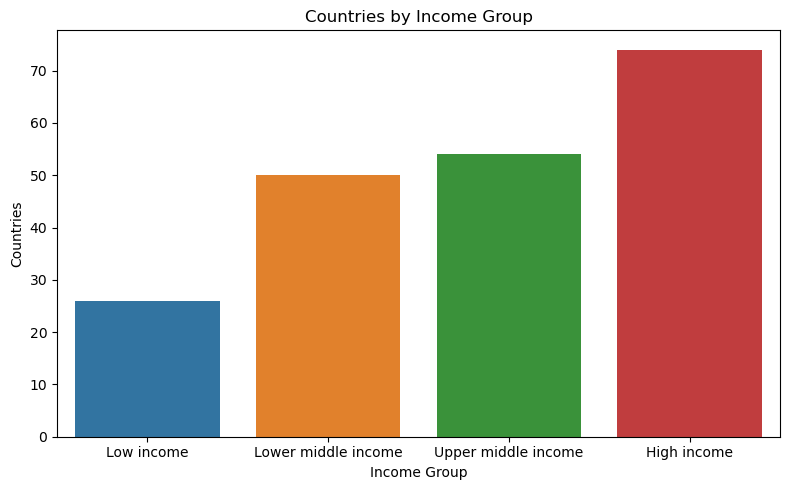

In [53]:
#Define the order
income_order = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Count unique countries per income group
unique_country_counts = cleanmerged_df.groupby('income_group')['country'].nunique().reindex(income_order)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_country_counts.index, y=unique_country_counts.values)
plt.title('Countries by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

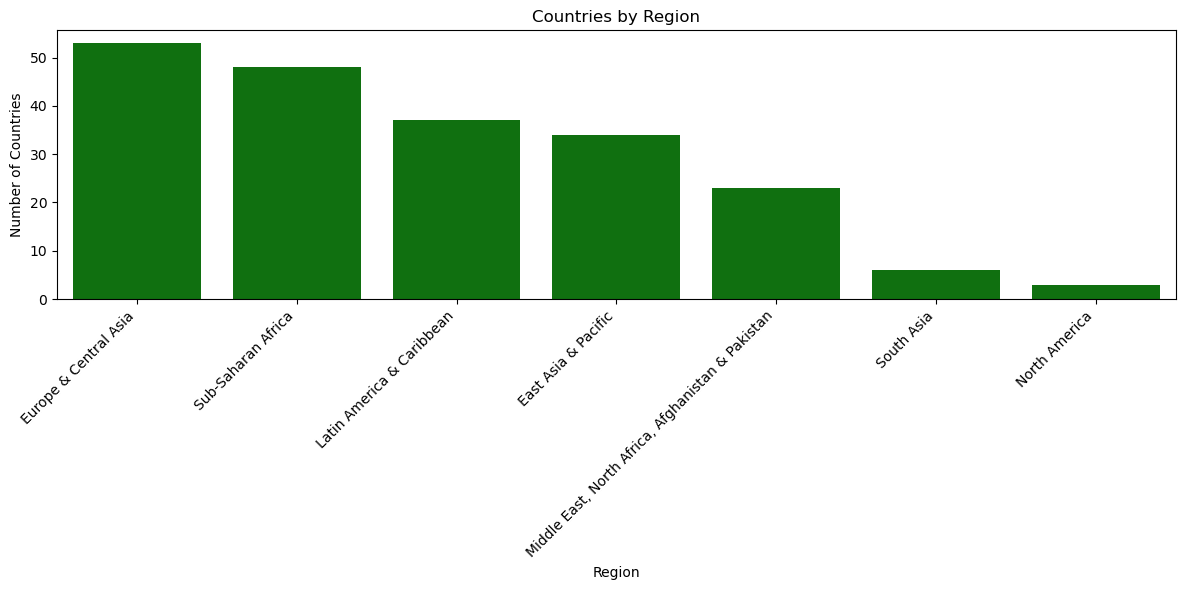

In [54]:
# Count unique countries per region
unique_country_counts_region = cleanmerged_df.groupby('region')['country'].nunique().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_country_counts_region.index, y=unique_country_counts_region.values,color="green")
plt.title('Countries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

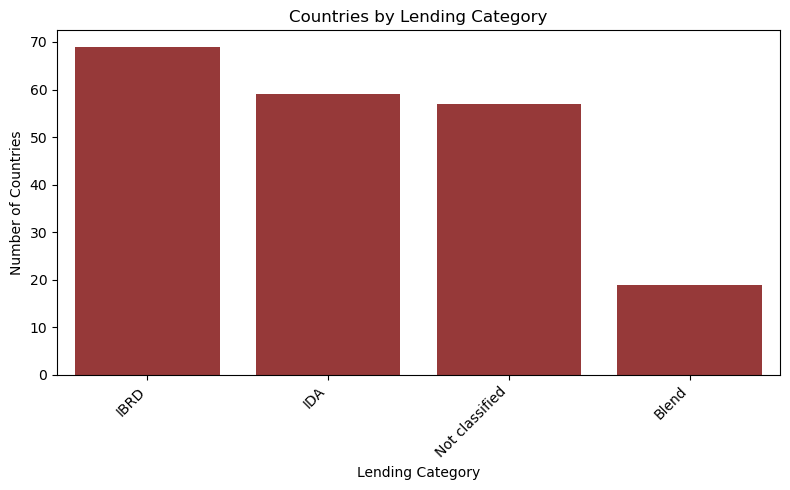

In [55]:
# Count unique countries per lending category
unique_country_counts_lending = cleanmerged_df.groupby('lending_category')['country'].nunique().sort_values(ascending=False)

# Vertical bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=unique_country_counts_lending.index, y=unique_country_counts_lending.values, color="brown")
plt.title('Countries by Lending Category')
plt.xlabel('Lending Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Numeric Plots

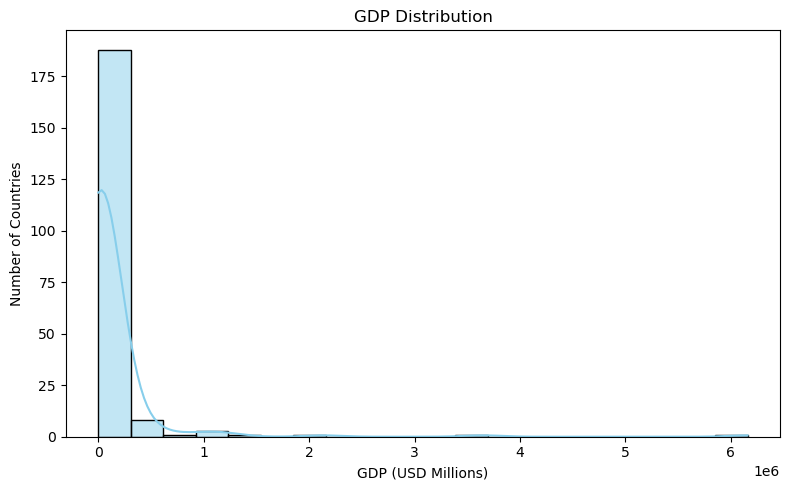

In [56]:
# Take the latest year per country to avoid duplicates over time
latest_year_df = cleanmerged_df.sort_values('year').groupby('country').last().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(latest_year_df['gdp_current_usd_M'], bins=20, kde= True, color='skyblue')
plt.title('GDP Distribution')
plt.xlabel('GDP (USD Millions)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

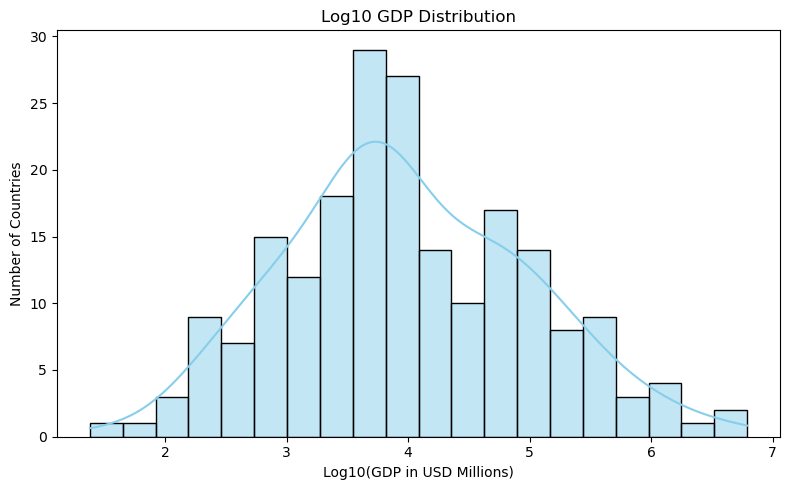

In [57]:
latest_year_df = cleanmerged_df.sort_values('year').groupby('country').last().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(np.log10(latest_year_df['gdp_current_usd_M']),kde= True, bins=20, color='skyblue')
plt.title('Log10 GDP Distribution')
plt.xlabel('Log10(GDP in USD Millions)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


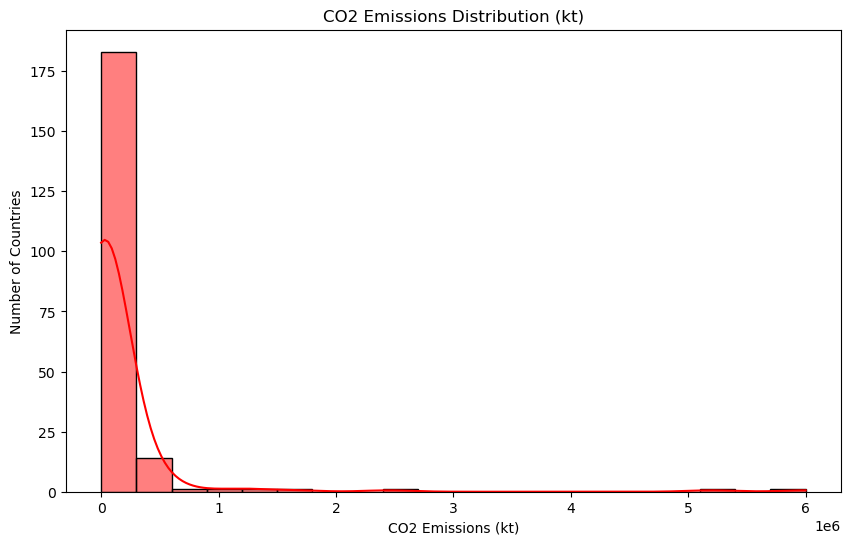

In [58]:
co2_country = cleanmerged_df.groupby('country')['co2_emissions'].mean()

plt.figure(figsize=(10,6))
sns.histplot(co2_country, bins=20, kde=True, color= 'red')
plt.title('CO2 Emissions Distribution (kt)')
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Number of Countries')
plt.show()

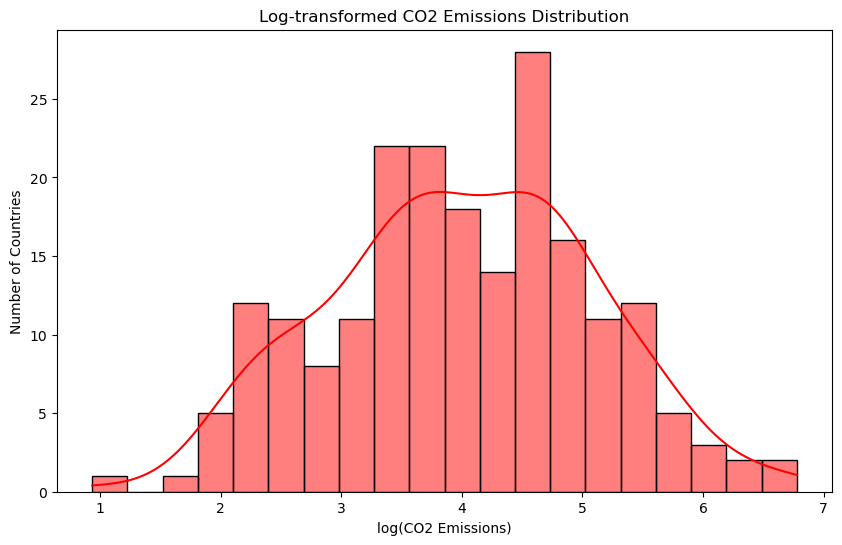

In [59]:
plt.figure(figsize=(10,6))
sns.histplot(np.log10(co2_country), bins=20, kde=True, color= "Red")  
plt.title('Log-transformed CO2 Emissions Distribution')
plt.xlabel('log(CO2 Emissions)')
plt.ylabel('Number of Countries')
plt.show()

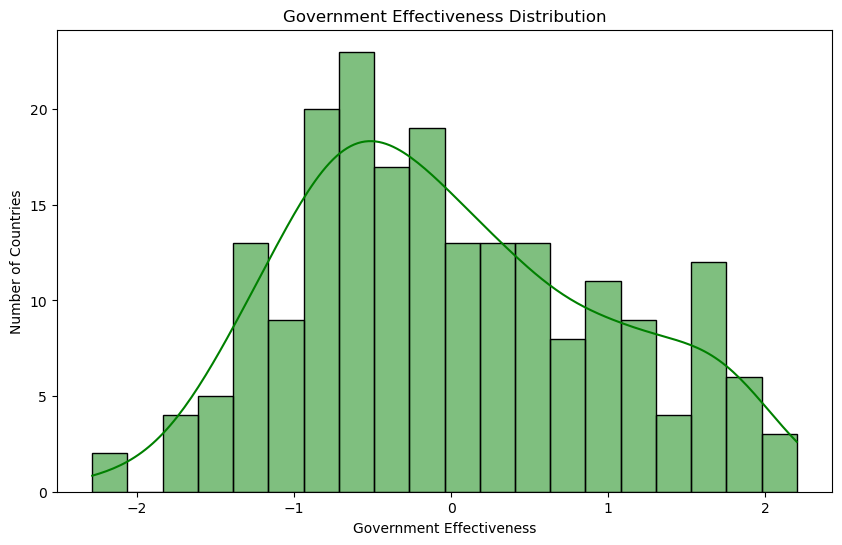

In [60]:
gov_country = cleanmerged_df.groupby('country')['gov_effectiveness_estimate'].mean()

plt.figure(figsize=(10,6))
sns.histplot(gov_country, bins=20, kde=True, color = 'green')
plt.title('Government Effectiveness Distribution')
plt.xlabel('Government Effectiveness')
plt.ylabel('Number of Countries')
plt.show()

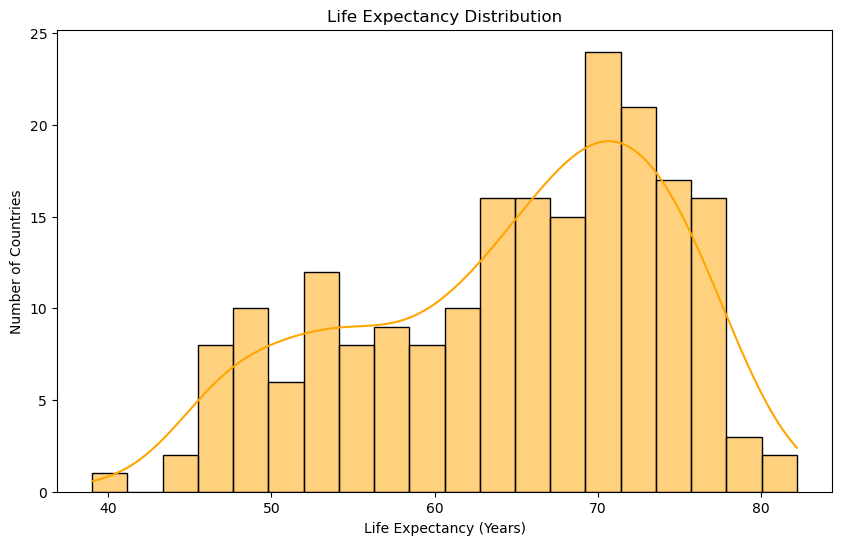

In [61]:
life_country = cleanmerged_df.groupby('country')['life_expectancy_at_birth'].mean()

plt.figure(figsize=(10,6))
sns.histplot(life_country, bins=20, kde=True, color = "orange")
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Number of Countries')
plt.show()


## List of Assumptions:

1. Missing Values
    Region & Income group:
       - If missing, imputed using the most frequent value in the country’s region.
       - For unique cases (like Venezuela), the income group was assigned based on most frequent 
         income in its region.

    Country-specific imputation:
    - For Korea, missing indicators were filled using median values of countries in the same region 
      and closest income group (Lower middle income).
    - Ethiopia’s missing income group was imputed based on its region (Sub-SaharanAfrica) and comparison 
      with similar countries.
    - Countries with no data in 8+ indicators were dropped eg. Gibraltar, St. Martin (French part), 
      French Polynesia

    Lending category:
    - High-income countries with missing lending category values were set as "Not classified".
    - Other countries’ lending category was imputed using the most frequent lending category in the same 
      Region and Income group.

2. Impossible Values

    - Checked that numeric columns cannot have negative values where it doesn’t make sense, e.g., 
      population_density, GDP_current_US, CO2_emissions, tax_revenue%, government_expenditure_on_education%,
      government_health_expenditure%, life_expectancy_at_birth.
    - inflation_annual% had negative values but we assumed that is deflation.

3. Column Selection / Dropping

    - Dropped columns based on:
        Redundancy: Standard deviation columns for governance indicators, duplicate variables.

    - High missingness: 
        Columns with many missing values (e.g., human_capital_index, research_and_development_expenditure%).

    - Irrelevance / complexity: 
        Indicators not directly relevant or technically complex for analysis (e.g., military expenditure, 
        rural population, birth/death rate).

Our assumption is that the remaining columns are sufficient for governance, economic, environmental, and demographic analysis.

4. Data Types

    - Ensured all columns have appropriate data types:
        Numeric for indicators, categorical for Region, Income group, Lending category, etc.


## Categorizing Indicators
For analysis purposes, we decided to keep the following indicators in the assigned categories and then choose from them

### Governance and institutional quality indicators:
 1. goverment_effectiveness_estimate
 2. control_of_corruption_estimate
 3. rule_of_law_estimate
 4. voice_and_accountability_estimate
 5. political_stability_estimate

### Environmental sustainability indicators:
 1. CO2_emisions
 2. renewvable_energy_consumption%
 3. forest_land%
 4. agricultural_land

### Economic performance and poverty reduction indicators
 1. GDP_current_US
 2. inflation_annual%
 3. tax_revenue%

### Human well-being and health indicators:
 1. life_expectancy_at_birth
 2. government_expenditure_on_education%
 3. government_health_expenditure%
 4. access_to_electricity%
 5. population_density

## Environmental Sustainability

--- Analyzing CO2 per capita (metric tons) ---
  Winsorized range: 0.048 → 1689.773
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  2.77 1.51    2.33
1           Low income   1664  0.29 0.40    0.16
2  Lower middle income   3200  0.75 0.52    0.63
3  Upper middle income   3456  1.51 0.61    1.45


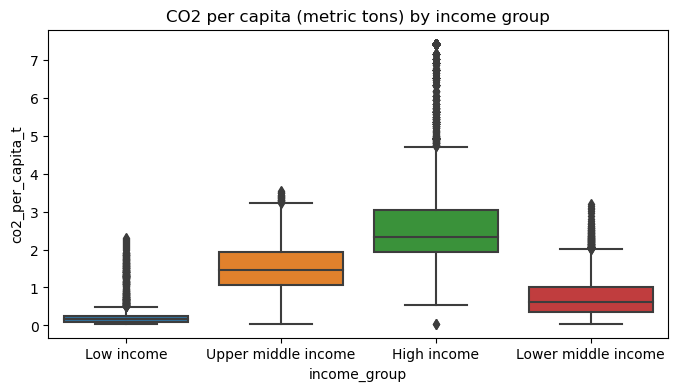


ANOVA table:
                  sum_sq       df       F  PR(>F)
C(income_group) 11663.74     3.00 3850.19    0.00
Residual        13179.89 13052.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -2.48   0.00  -2.55  -2.40   
1          High income  Lower middle income     -2.02   0.00  -2.08  -1.96   
2          High income  Upper middle income     -1.26   0.00  -1.32  -1.20   
3           Low income  Lower middle income      0.46   0.00   0.38   0.54   
4           Low income  Upper middle income      1.22   0.00   1.14   1.30   
5  Lower middle income  Upper middle income      0.76   0.00   0.70   0.83   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


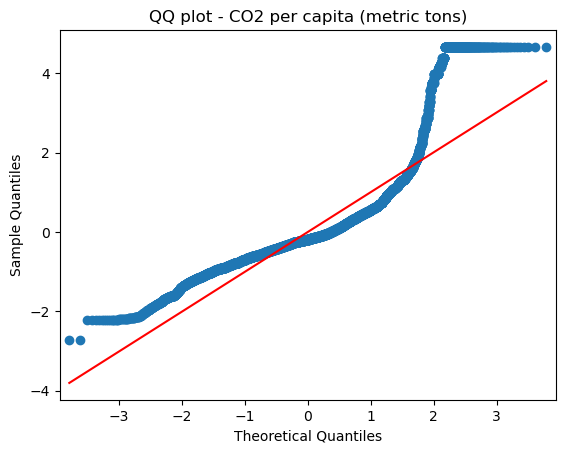

--- Analyzing Renewable energy (% of consumption) ---
  Winsorized range: 0.000 → 94.284
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  1.86 1.32    2.04
1           Low income   1664  4.01 1.03    4.45
2  Lower middle income   3200  3.68 0.95    3.96
3  Upper middle income   3456  2.56 1.14    2.79


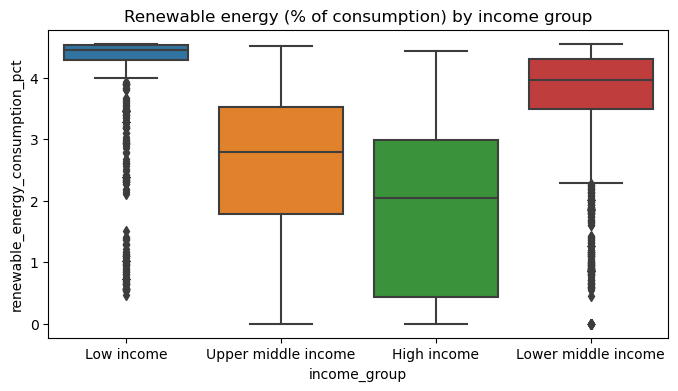


ANOVA table:
                  sum_sq       df       F  PR(>F)
C(income_group)  9317.09     3.00 2331.31    0.00
Residual        17387.43 13052.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income      2.16   0.00   2.07   2.24   
1          High income  Lower middle income      1.82   0.00   1.75   1.89   
2          High income  Upper middle income      0.70   0.00   0.64   0.77   
3           Low income  Lower middle income     -0.34   0.00  -0.43  -0.25   
4           Low income  Upper middle income     -1.45   0.00  -1.54  -1.37   
5  Lower middle income  Upper middle income     -1.12   0.00  -1.19  -1.04   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


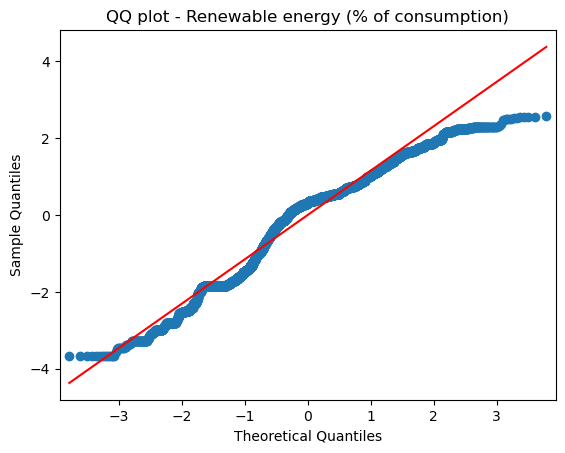

--- Analyzing Forest area (% of land) ---
  Winsorized range: 0.000 → 93.758
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  3.07 1.29    3.53
1           Low income   1664  2.80 1.05    2.82
2  Lower middle income   3200  3.00 1.26    3.40
3  Upper middle income   3456  3.28 1.03    3.58


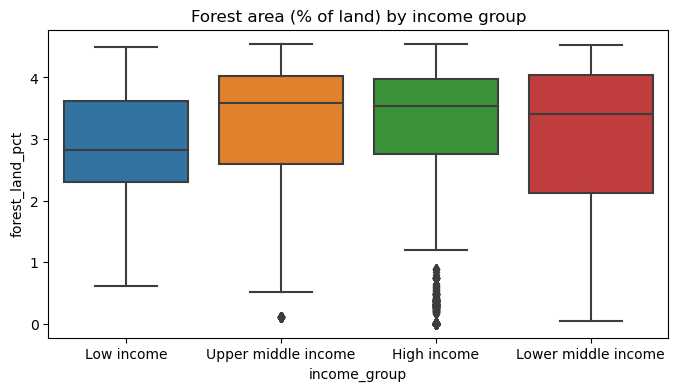


ANOVA table:
                  sum_sq       df     F  PR(>F)
C(income_group)   279.56     3.00 65.81    0.00
Residual        18481.34 13052.00   NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -0.26   0.00  -0.35  -0.18   
1          High income  Lower middle income     -0.06   0.10  -0.13   0.01   
2          High income  Upper middle income      0.21   0.00   0.14   0.28   
3           Low income  Lower middle income      0.20   0.00   0.11   0.29   
4           Low income  Upper middle income      0.47   0.00   0.38   0.56   
5  Lower middle income  Upper middle income      0.27   0.00   0.20   0.35   

   reject  
0    True  
1   False  
2    True  
3    True  
4    True  
5    True  


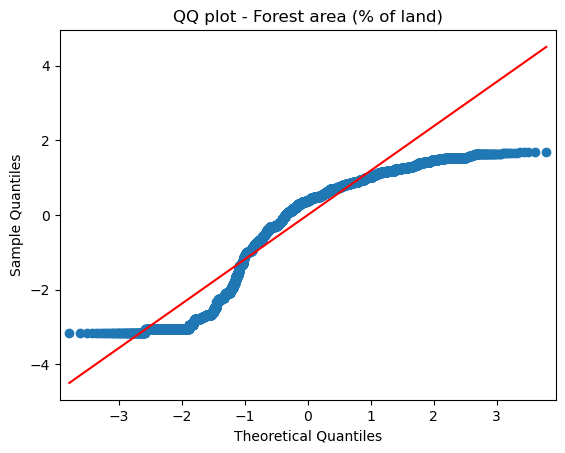

--- Analyzing Agricultural land (% of land) ---
  Winsorized range: 0.920 → 81.594
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0          High income   4736  3.15 0.94    3.37
1           Low income   1664  3.71 0.57    3.83
2  Lower middle income   3200  3.48 0.80    3.67
3  Upper middle income   3456  3.48 0.74    3.72


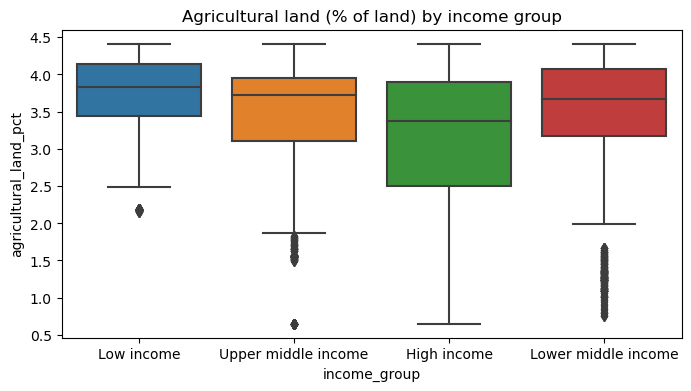


ANOVA table:
                 sum_sq       df      F  PR(>F)
C(income_group)  487.16     3.00 244.87    0.00
Residual        8655.55 13052.00    NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income      0.55   0.00   0.49   0.61   
1          High income  Lower middle income      0.33   0.00   0.28   0.37   
2          High income  Upper middle income      0.33   0.00   0.28   0.37   
3           Low income  Lower middle income     -0.23   0.00  -0.29  -0.16   
4           Low income  Upper middle income     -0.23   0.00  -0.29  -0.16   
5  Lower middle income  Upper middle income      0.00   1.00  -0.05   0.05   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5   False  


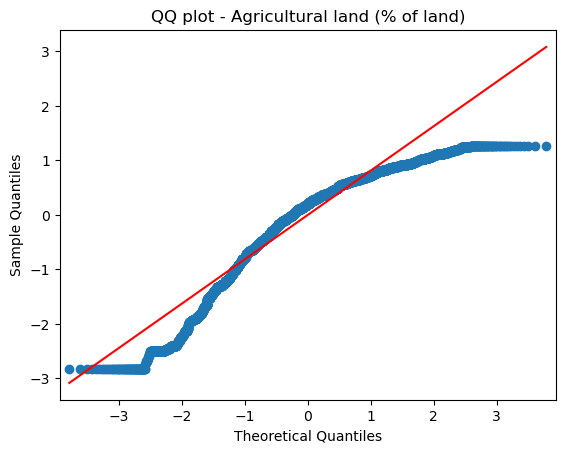

In [62]:
# Compute CO2 per capita
cleanmerged_df['co2_per_capita_t'] = cleanmerged_df['co2_emissions'] / (cleanmerged_df['pop_M']*1000)

# Environmental indicators
indicators = {
    'co2_per_capita_t': 'CO2 per capita (metric tons)',
    'renewable_energy_consumption_pct': 'Renewable energy (% of consumption)',
    'forest_land_pct': 'Forest area (% of land)',
    'agricultural_land_pct': 'Agricultural land (% of land)'
}

results = {}

for col, label in indicators.items():
    print(f"--- Analyzing {label} ---")
    data = cleanmerged_df[['income_group', col]].dropna()

    #CO2 Cleaning

    # Winsorization (remove extreme outliers)
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower, upper=upper)
    print(f"  Winsorized range: {lower:.3f} → {upper:.3f}")

    # Safe log1p transform (includes zeros)
    data[col] = np.log1p(data[col])

    # Replace infinite values and drop NA
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    print("  Applied log1p transform successfully.")

   
    # Making sure that no group has zero variance
    group_counts = data.groupby('income_group')[col].nunique()
    if (group_counts <= 1).any():
        print(f"Skipping {label} — some income groups have zero variance.")
        continue
    
    # Summary stats
    summary = data.groupby('income_group')[col].agg(['count','mean','std','median']).reset_index()
    print("\nSummary statistics:")
    print(summary)
    results[col] = summary
    
    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(x='income_group', y=col, data=data)
    plt.title(f"{label} by income group")
    plt.show()
    
    # ANOVA
    try:
        model = ols(f'{col} ~ C(income_group)', data=data).fit()
        anova_table = anova_lm(model, typ=2)
        print("\nANOVA table:")
        print(anova_table)
    except Exception as e:
        print(f"ANOVA failed for {col}: {e}")
        continue
    
    # Tukey post-hoc
    try:
        tukey = pairwise_tukeyhsd(endog=data[col], groups=data['income_group'], alpha=0.05)
        tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        print("\nTukey post-hoc results:")
        print(tukey_df)
    except Exception as e:
        print(f"Tukey post-hoc failed for {col}: {e}")
    
    # QQ plot of residuals
    import statsmodels.api as sm
    sm.qqplot(model.resid, line='s')
    plt.title(f"QQ plot - {label}")
    plt.show()

In [63]:
observations = []
observations.append("Observations")
observations.append("="*60)

for col, label in indicators.items():
    summary = results.get(col)
    if summary is None:
        continue
    observations.append(f"{label}:")
    group_stats = "; ".join([f"{row['income_group']}: mean={row['mean']:.2f} (n={int(row['count'])})" 
                             for _, row in summary.iterrows()])
    observations.append(f"  By income group — {group_stats}.\n")


print("\n" + "\n".join(observations))


Observations
CO2 per capita (metric tons):
  By income group — High income: mean=2.77 (n=4736); Low income: mean=0.29 (n=1664); Lower middle income: mean=0.75 (n=3200); Upper middle income: mean=1.51 (n=3456).

Renewable energy (% of consumption):
  By income group — High income: mean=1.86 (n=4736); Low income: mean=4.01 (n=1664); Lower middle income: mean=3.68 (n=3200); Upper middle income: mean=2.56 (n=3456).

Forest area (% of land):
  By income group — High income: mean=3.07 (n=4736); Low income: mean=2.80 (n=1664); Lower middle income: mean=3.00 (n=3200); Upper middle income: mean=3.28 (n=3456).

Agricultural land (% of land):
  By income group — High income: mean=3.15 (n=4736); Low income: mean=3.71 (n=1664); Lower middle income: mean=3.48 (n=3200); Upper middle income: mean=3.48 (n=3456).



## Environmental Story

High-income countries sit at one end of the global environmental spectrum. Their economies are built on decades of industrialization, technological advancement, and energy-intensive lifestyles. With this prosperity comes a cost: these nations emit far more CO₂ per capita than any other group. Their consumption patterns, transportation systems, and reliance on fossil fuels drive emissions upward. At the same time, they maintain relatively stable shares of forest and agricultural land, protected in many cases by strong regulations and well-funded environmental institutions.

Low-income countries tell a very different story. Their CO₂ emissions are the lowest in the world, not because of cleaner systems, but because industrial activity remains limited and energy use is modest. Instead, their lives and economies are closely tied to the land. High levels of agricultural land reflect dependence on subsistence farming and natural resources for livelihoods. Renewable energy use is also relatively high, often because traditional biomass and non-modern energy sources remain common.

Middle-income nations (both lower-middle and upper-middle) write the chapter of transition. They sit between two worlds: expanding industrial sectors increase emissions, yet renewable energy adoption is still developing. Their land use patterns sit between low- and high-income groups, reflecting gradual shifts from agriculture-dependent economies toward diversified, industrialized ones. These countries face the complex task of growing their economies while attempting to avoid the high-emission path taken historically by wealthy nations.

Together, these narratives form a global picture of environmental sustainability shaped deeply by income. Wealthier nations grapple with the consequences of growth, poorer nations rely heavily on land and natural resources, and middle-income nations navigate the turbulence of development. This story makes one message clear: sustainability is not a one-size-fits-all challenge. Each income group carries its own responsibilities — and its own opportunities — in steering the planet toward a more sustainable future.

# Economic performance and poverty reduction indicators

In [64]:
import warnings
warnings.filterwarnings(action='ignore')

In [65]:
pd.set_option('display.max_columns',None)

In [72]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import levene, shapiro
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [67]:
#Clean income group names
cleanmerged_df['income_group'] = cleanmerged_df['income_group'].str.strip()
cleanmerged_df['income_group'] = pd.Categorical(
    cleanmerged_df['income_group'],
    categories=['Low income','Lower middle income','Upper middle income','High income'],
    ordered=True
)

In [68]:
#Selecting economic indicators
econ_indicators = {
    'gdp_current_usd_M': 'GDP (USD Millions)',
    'inflation_yr_pct': 'Inflation (%)',
    'tax_revenue_pct': 'Tax Revenue (% of GDP)'
}


=== Analyzing GDP (USD Millions) ===
                     count      mean        std   median
income_group                                            
Low income            1664   8160.10   17507.43  2398.00
Lower middle income   3200  35736.90  172376.98  4657.61
Upper middle income   3456 132174.36  804911.52  8713.07
High income           4736 334334.04 1366683.84 24311.57 



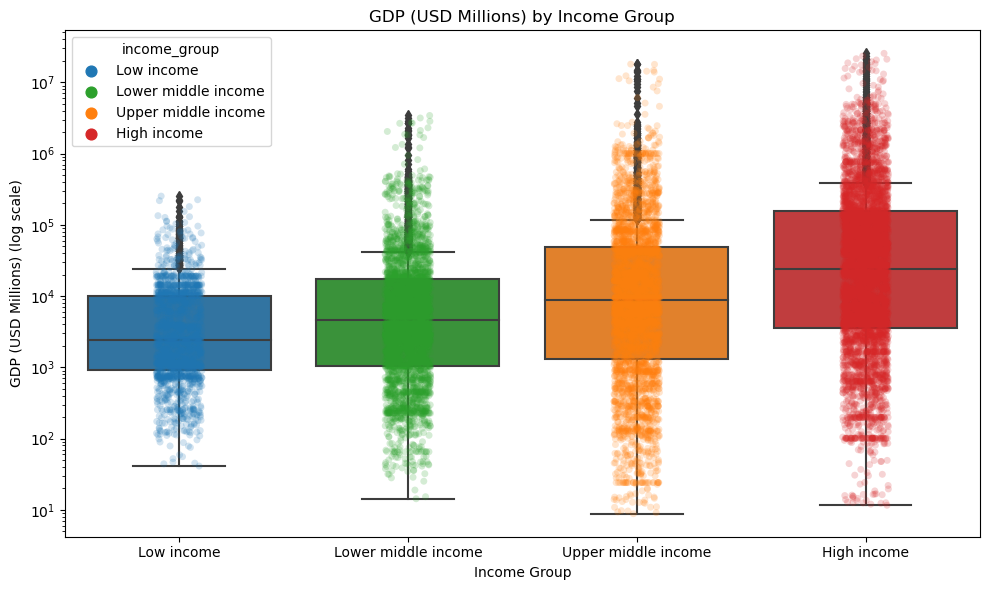

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0000

ANOVA results:
                              sum_sq       df     F  PR(>F)
C(income_group)   233910241448940.34     3.00 91.04    0.00
Residual        11178148484734716.00 13052.00   NaN     NaN

Tukey post-hoc results:
                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
       group1              group2         meandiff   p-adj     lower        upper     reject
--------------------------------------------------------------------------------------------
        High income          Low income -326173.9444    0.0 -393934.8657 -258413.0232   True
        High income Lower middle income -298597.1433    0.0 -353008.7833 -244185.5033   True
        High income Upper middle income -202159.6867    0.0  -255355.087 -148964.2865   True
         Low income Lower middle income   27576.8011 0.7575  -44288.1204   99441.7226  False
         Low income Upper middle income  124014.

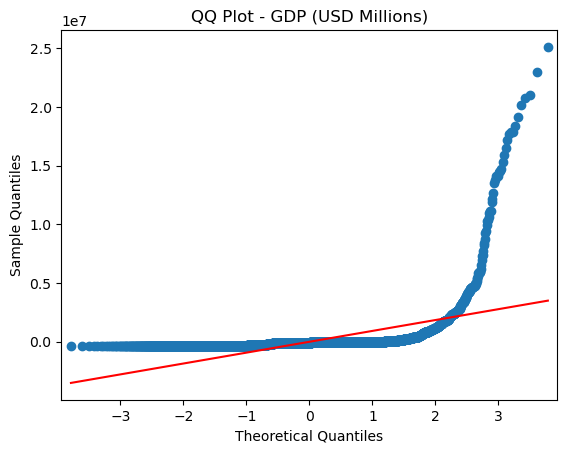


=== Analyzing Inflation (%) ===
                     count  mean    std  median
income_group                                   
Low income            1664 31.57 596.16    6.52
Lower middle income   3200 16.29 228.82    5.77
Upper middle income   3456 22.83 203.58    5.30
High income           4736  8.84  52.13    3.30 



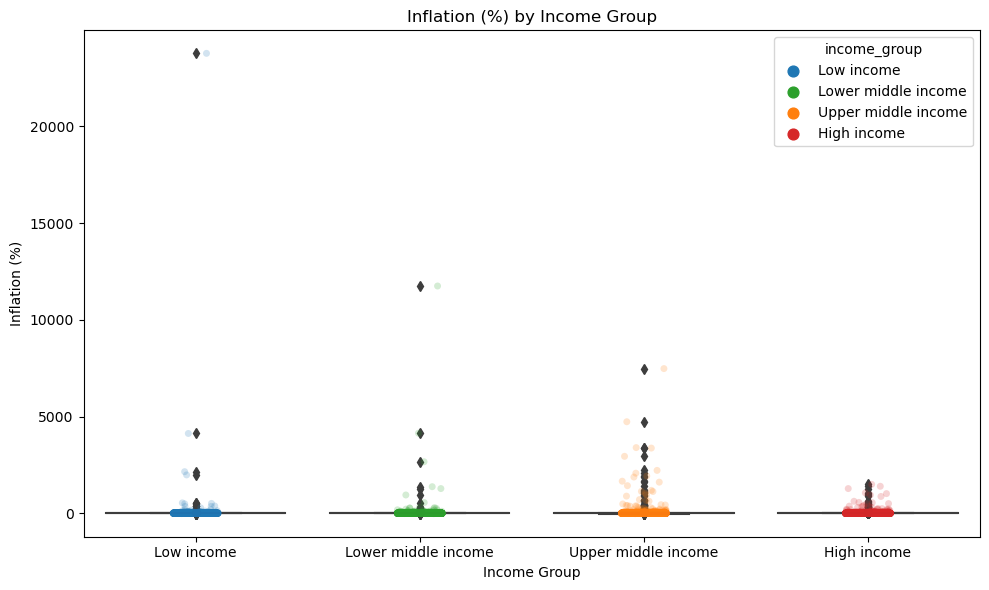

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0183

ANOVA results:
                      sum_sq       df    F  PR(>F)
C(income_group)    787034.01     3.00 3.74    0.01
Residual        914588021.61 13052.00  NaN     NaN

Tukey post-hoc results:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------
        High income          Low income   22.734 0.0138   3.3516 42.1164   True
        High income Lower middle income   7.4524 0.6075  -8.1116 23.0163  False
        High income Upper middle income   13.993 0.0844  -1.2231  29.209  False
         Low income Lower middle income -15.2816 0.2238 -35.8379  5.2747  False
         Low income Upper middle income   -8.741 0.6854 -29.0352 11.5531  False
Lower middle income Upper middle income   6.5406 0.7452 -10.1451 23.2263  False
------

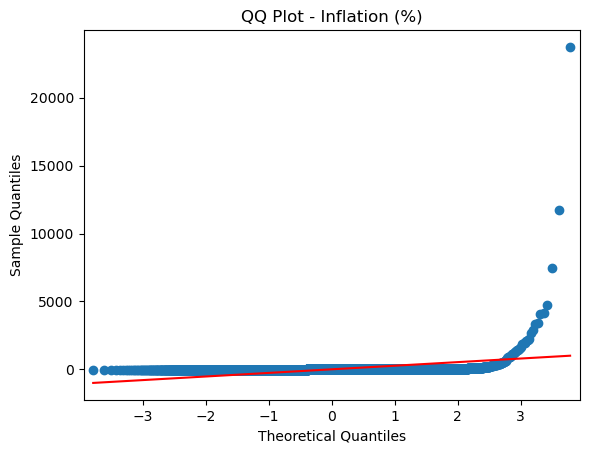


=== Analyzing Tax Revenue (% of GDP) ===
                     count  mean  std  median
income_group                                 
Low income            1664 10.68 4.07   10.67
Lower middle income   3200 14.79 6.95   13.45
Upper middle income   3456 14.81 5.05   14.73
High income           4736 18.09 6.95   18.36 



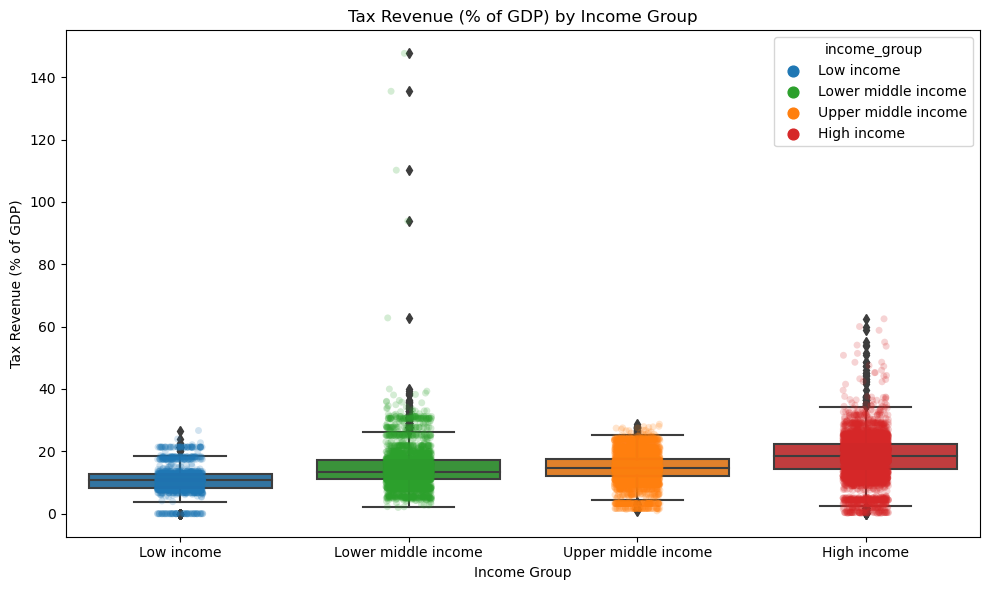

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0000

ANOVA results:
                   sum_sq       df      F  PR(>F)
C(income_group)  73715.63     3.00 642.58    0.00
Residual        499102.08 13052.00    NaN     NaN

Tukey post-hoc results:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
        High income          Low income   -7.412    0.0 -7.8648 -6.9593   True
        High income Lower middle income  -3.2993    0.0 -3.6628 -2.9357   True
        High income Upper middle income  -3.2827    0.0 -3.6382 -2.9273   True
         Low income Lower middle income   4.1128    0.0  3.6326   4.593   True
         Low income Upper middle income   4.1293    0.0  3.6553  4.6034   True
Lower middle income Upper middle income   0.0166 0.9995 -0.3732  0.4063  False
------------------

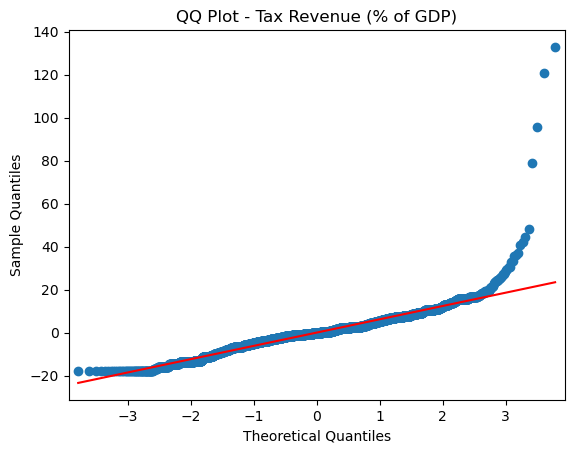

In [83]:
palette = {
    "Low income": "#1f77b4",
    "Lower middle income": "#2ca02c",
    "Upper middle income": "#ff7f0e",
    "High income": "#d62728"
}
#Loop through indicators
for col, label in econ_indicators.items():
    print(f"\n=== Analyzing {label} ===")
    data = cleanmerged_df[['income_group', col]].dropna()

    # Summary statistics
    summary_df = data.groupby('income_group')[col].agg(['count','mean','std','median'])
    results[col] = {'summary': summary_df}
    print(summary_df, "\n")

    plt.figure(figsize=(10,6))
    sns.boxplot(
        x='income_group',
        y=col,
        data=data,
        palette=palette
    )
    sns.stripplot(
    x='income_group',
    y=col,
    data=data,
    hue='income_group',
    palette=palette,
    dodge=False,
    alpha=0.2,
    size=5,
    jitter=0.1,
    )
    if col == 'gdp_current_usd_M':
        plt.yscale('log')
        plt.ylabel(f"{label} (log scale)")
    else:
        plt.ylabel(label)
    plt.xlabel("Income Group")
    plt.title(f"{label} by Income Group")
    plt.tight_layout()
    plt.show()
    
    #Normality check
    stat, pval = shapiro(data[col])
    print(f"Shapiro-Wilk test p-value: {pval:.4f}")

    # Variance check
    groups = [g[col].values for _, g in data.groupby('income_group')]
    lev_stat, lev_p = levene(*groups)
    print(f"Levene test p-value (equal variances): {lev_p:.4f}")

    #ANOVA
    model = ols(f'{col} ~ C(income_group)', data=data).fit()
    anova_table = anova_lm(model, typ=2)
    print("\nANOVA results:")
    print(anova_table)
    results[col]['anova'] = anova_table

    #Tukey post-hoc
    tukey = pairwise_tukeyhsd(endog=data[col], groups=data['income_group'], alpha=0.05)
    print("\nTukey post-hoc results:")
    print(tukey.summary())
    results[col]['tukey'] = tukey.summary()

    #QQ plot of residuals
    sm.qqplot(model.resid, line='s')
    plt.title(f"QQ Plot - {label}")
    plt.show()


Economic performance and fiscal capacity clearly vary across income groups. High-income countries benefit from high GDP, stable inflation, and effective taxation systems, while low-income countries face challenges in all three indicators. Middle-income countries are in transition, balancing growth and stability. These patterns underscore the importance of income-specific policies to reduce poverty, stabilize prices, and strengthen public finances.

# Governance Analysis

--- Analyzing Goverment effectiveness ---
  Winsorized range: -2.084 → 2.030
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0           Low income    641 -1.49 1.12   -1.17
1  Lower middle income   2544 -0.97 0.90   -0.82
2  Upper middle income   3109 -0.37 0.73   -0.22
3          High income   4736  0.62 0.39    0.70


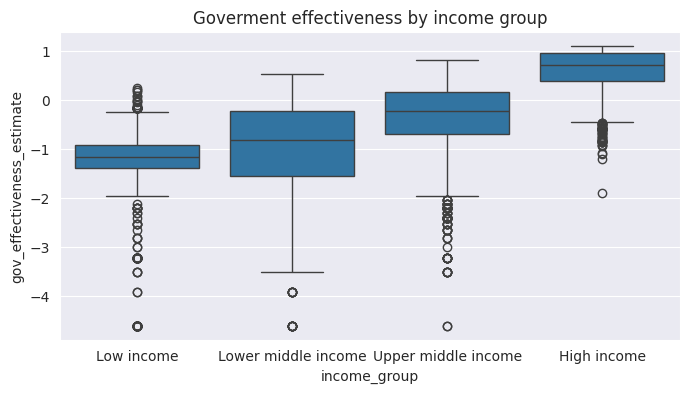

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0000

ANOVA table:
                 sum_sq       df       F  PR(>F)
C(income_group) 5842.71     3.00 4103.94    0.00
Residual        5232.52 11026.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -2.11   0.00  -2.19  -2.04   
1          High income  Lower middle income     -1.59   0.00  -1.64  -1.55   
2          High income  Upper middle income     -0.99   0.00  -1.03  -0.95   
3           Low income  Lower middle income      0.52   0.00   0.44   0.60   
4           Low income  Upper middle income      1.12   0.00   1.04   1.20   
5  Lower middle income  Upper middle income      0.60   0.00   0.55   0.65   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


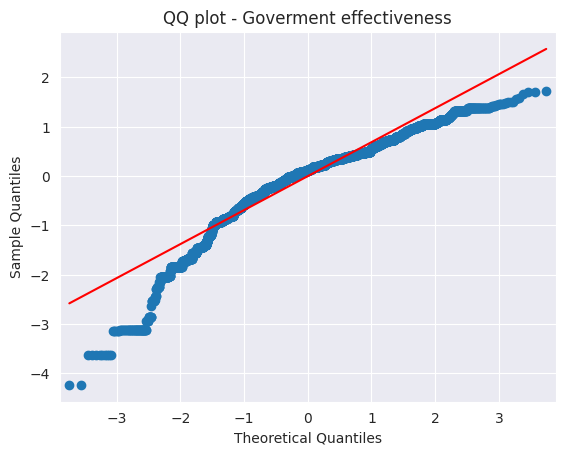

--- Analyzing Control of corruption ---
  Winsorized range: -1.650 → 2.230
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0           Low income    839 -1.07 0.75   -0.97
1  Lower middle income   2300 -0.81 0.96   -0.67
2  Upper middle income   2988 -0.50 0.86   -0.43
3          High income   4728  0.57 0.57    0.70


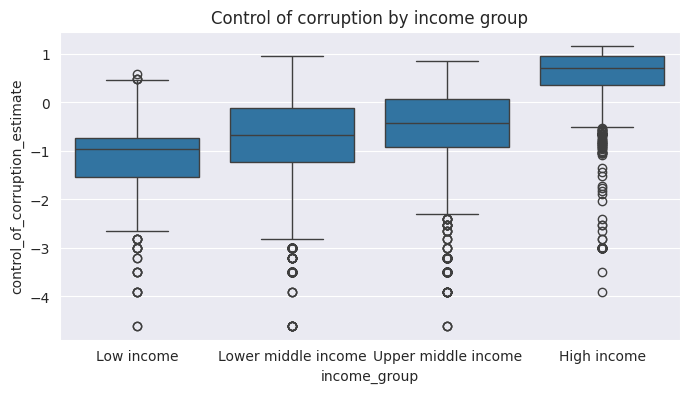

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0000

ANOVA table:
                 sum_sq       df       F  PR(>F)
C(income_group) 4503.63     3.00 2561.50    0.00
Residual        6359.41 10851.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -1.64   0.00  -1.71  -1.57   
1          High income  Lower middle income     -1.37   0.00  -1.42  -1.32   
2          High income  Upper middle income     -1.07   0.00  -1.11  -1.02   
3           Low income  Lower middle income      0.27   0.00   0.19   0.34   
4           Low income  Upper middle income      0.57   0.00   0.50   0.65   
5  Lower middle income  Upper middle income      0.31   0.00   0.25   0.36   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


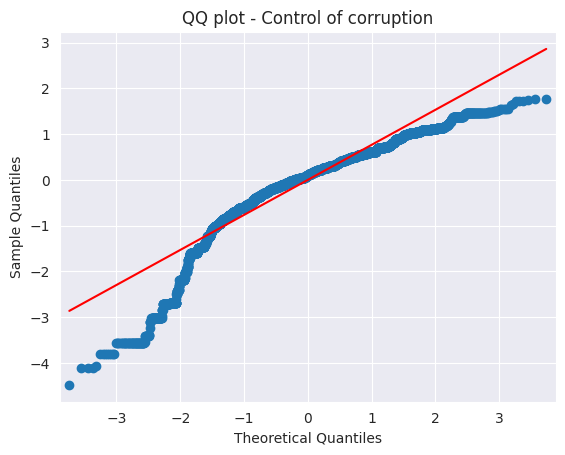

--- Analyzing Rule of law ---
  Winsorized range: -1.970 → 1.930
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0           Low income    863 -1.31 1.08   -0.99
1  Lower middle income   2207 -0.76 0.97   -0.56
2  Upper middle income   2992 -0.45 0.82   -0.37
3          High income   4731  0.61 0.46    0.68


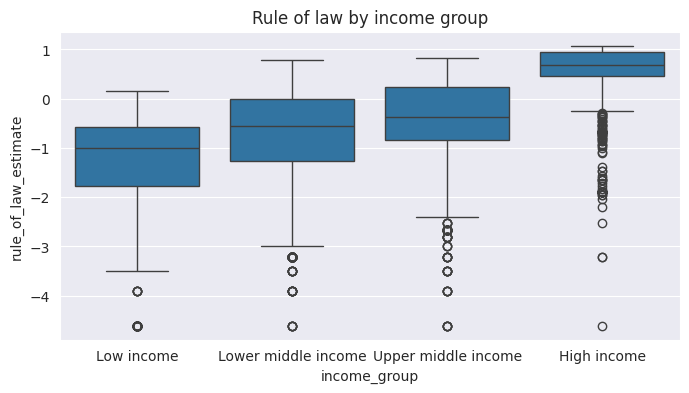

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0000

ANOVA table:
                 sum_sq       df       F  PR(>F)
C(income_group) 4972.28     3.00 2946.63    0.00
Residual        6068.62 10789.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -1.92   0.00  -1.99  -1.84   
1          High income  Lower middle income     -1.37   0.00  -1.42  -1.32   
2          High income  Upper middle income     -1.06   0.00  -1.11  -1.02   
3           Low income  Lower middle income      0.55   0.00   0.47   0.62   
4           Low income  Upper middle income      0.85   0.00   0.78   0.92   
5  Lower middle income  Upper middle income      0.30   0.00   0.25   0.36   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


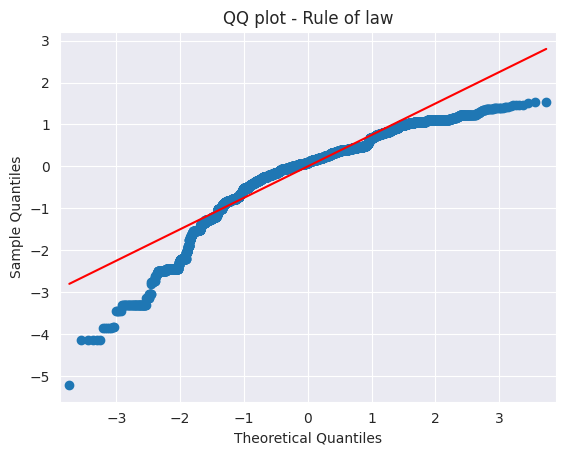

--- Analyzing Voice and accountability ---
  Winsorized range: -2.110 → 1.570
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0           Low income    763 -0.86 1.03   -0.34
1  Lower middle income   2344 -0.51 0.90   -0.37
2  Upper middle income   2758  0.00 0.71    0.10
3          High income   4482  0.53 0.66    0.71


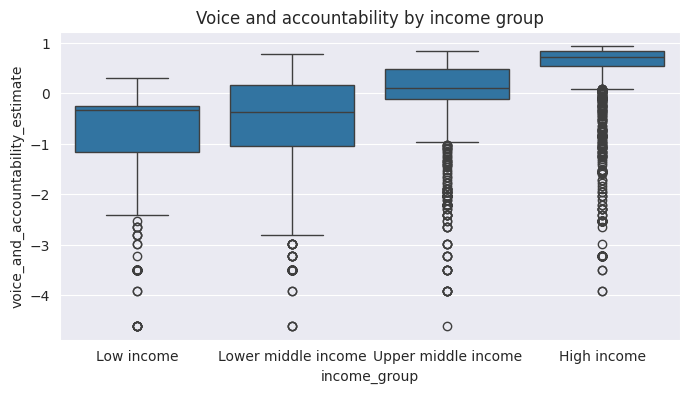

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0000

ANOVA table:
                 sum_sq       df       F  PR(>F)
C(income_group) 2434.47     3.00 1393.73    0.00
Residual        6022.13 10343.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -1.39   0.00  -1.47  -1.32   
1          High income  Lower middle income     -1.05   0.00  -1.10  -1.00   
2          High income  Upper middle income     -0.53   0.00  -0.58  -0.48   
3           Low income  Lower middle income      0.35   0.00   0.26   0.43   
4           Low income  Upper middle income      0.86   0.00   0.78   0.94   
5  Lower middle income  Upper middle income      0.52   0.00   0.46   0.57   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


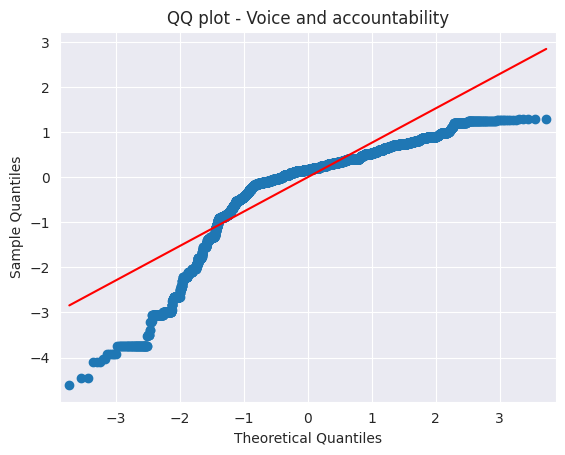

--- Analyzing Political stability ---
  Winsorized range: -2.510 → 1.460
  Applied log1p transform successfully.

Summary statistics:
          income_group  count  mean  std  median
0           Low income    865 -0.65 0.79   -0.43
1  Lower middle income   2359 -0.45 0.93   -0.33
2  Upper middle income   3053 -0.16 0.81    0.03
3          High income   4666  0.51 0.47    0.64


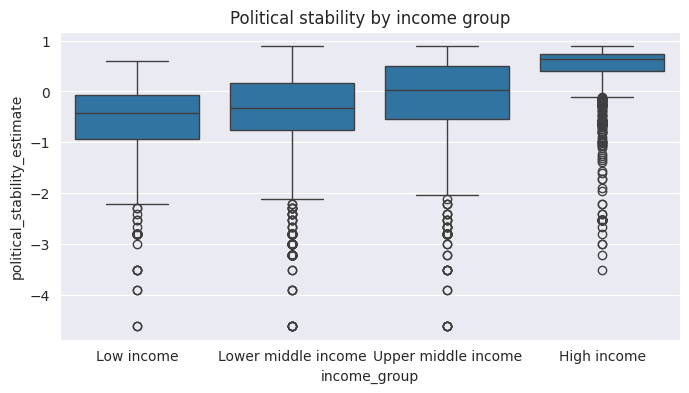

Shapiro-Wilk test p-value: 0.0000
Levene test p-value (equal variances): 0.0000

ANOVA table:
                 sum_sq       df       F  PR(>F)
C(income_group) 2135.89     3.00 1388.97    0.00
Residual        5607.15 10939.00     NaN     NaN

Tukey post-hoc results:
                group1               group2  meandiff  p-adj  lower  upper  \
0          High income           Low income     -1.16   0.00  -1.23  -1.09   
1          High income  Lower middle income     -0.96   0.00  -1.01  -0.92   
2          High income  Upper middle income     -0.67   0.00  -0.71  -0.63   
3           Low income  Lower middle income      0.20   0.00   0.13   0.27   
4           Low income  Upper middle income      0.49   0.00   0.42   0.56   
5  Lower middle income  Upper middle income      0.29   0.00   0.24   0.34   

   reject  
0    True  
1    True  
2    True  
3    True  
4    True  
5    True  


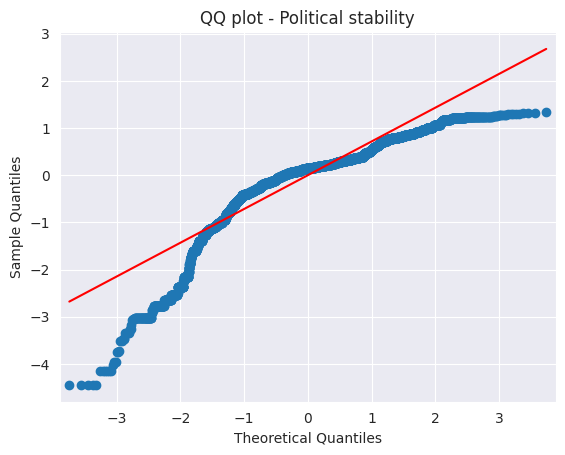

In [145]:
# Rewriting the code provided by my fellow classmates for governance indicators

# Gov indicators
gov_indicators = {
    'Goverment effectiveness': 'gov_effectiveness_estimate',
    'Control of corruption': 'control_of_corruption_estimate',
    'Rule of law': 'rule_of_law_estimate',
    'Voice and accountability': 'voice_and_accountability_estimate',
    'Political stability': 'political_stability_estimate'
}

results = {}

for label, col in gov_indicators.items():
    print(f"--- Analyzing {label} ---")
    data = cleanmerged_df[['income_group', col]].dropna()

    # Winsorization (remove extreme outliers)
    lower = data[col].quantile(0.01)
    upper = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower, upper=upper)
    print(f"  Winsorized range: {lower:.3f} → {upper:.3f}")

    # Safe log1p transform (includes zeros)
    data[col] = np.log1p(data[col])

    # Replace infinite values and drop NA
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    print("  Applied log1p transform successfully.")

    # Making sure that no group has zero variance
    group_counts = data.groupby('income_group')[col].nunique()
    if (group_counts <= 1).any():
        print(f"Skipping {label} — some income groups have zero variance.")
        continue

    # Summary stats
    summary = data.groupby('income_group')[col].agg(['count','mean','std','median']).reset_index()
    print("\nSummary statistics:")
    print(summary)
    results[col] = summary

    # Boxplot
    plt.figure(figsize=(8,4))
    sns.boxplot(x='income_group', y=col, data=data)
    plt.title(f"{label} by income group")
    plt.show()

    # Normality check (Shapiro-Wilk test)
    stat, pval = shapiro(data[col])
    print(f"Shapiro-Wilk test p-value: {pval:.4f}")

    # Variance check
    groups = [g[col].values for _, g in data.groupby('income_group')]
    lev_stat, lev_p = levene(*groups)
    print(f"Levene test p-value (equal variances): {lev_p:.4f}")

    # ANOVA
    try:
        model = ols(f'{col} ~ C(income_group)', data=data).fit()
        anova_table = anova_lm(model, typ=2)
        print("\nANOVA table:")
        print(anova_table)
    except Exception as e:
        print(f"ANOVA failed for {col}: {e}")
        continue

    # Tukey post-hoc
    try:
        tukey = pairwise_tukeyhsd(endog=data[col], groups=data['income_group'], alpha=0.05)
        tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        print("\nTukey post-hoc results:")
        print(tukey_df)
    except Exception as e:
        print(f"Tukey post-hoc failed for {col}: {e}")

    # QQ plot of residuals
    import statsmodels.api as sm
    sm.qqplot(model.resid, line='s')
    plt.title(f"QQ plot - {label}")
    plt.show()

## Governance Story:

The analysis shows that none of the indicators is normally-distributed. Although this hinders the statistical tests applied and their explanation power, it can clearly be seen in the results and the respective boxplots, that there is always the trend in the data that higher income correlates with higher means in political stability, governance effectiveness, rule of law, voice&accountability and corruption control. Interestingly, the standard deviance and, hence, also the variance is lowest in high income countries for each indicator applied.

